# NASA: Asteroids Classification

**Acest Notebook a fost generat de ChatGPT[1] și Claude[2] astfel**  
**- secventele de cod 90 %**  
**- comentariile din cod 95%**  
**Contributia personala a constat în studierea codului, modificarea și împărțirea acestuia pe capitole, traducerea lui și a comentariilor.**  
**De asemenea, modificările care s-au făcut asupra codului de la Claude [2] sunt gândite de mine cu ajutorul ChatGPT[1] și în procent de 80% executate de ChatGPT.**  
**Ca surse de informare asupra rezolvării acestui proiect au fost folosite laboratoarele și cursul de InvA, alături de Claude[2].**  
**Valorile procentuale de mai sus sunt aproximative dar reflectă în esență adevărul.**

### 1. Descrierea problemei

Fișierul nasa.csv[3] este un set de date colectat de la NASA API, care conține informații despre asteroizi. Fiecare rând este un asteroid, iar fiecare coloană este o caracteristică a lui.  
Coloanele din acest dataset sunt:  
1. Neo Reference ID – identificator unic al asteroidului în baza de date NASA [1]

2. Name – numele sau denumirea asteroidului [1]

3. Absolute Magnitude – mărimea absolută a asteroidului, un indicator al luminozității sale [1]

4. Est Dia in KM(min/max) – estimarea diametrului asteroidului în kilometri (valoarea minimă și maximă) [1]

5. Est Dia in M(min/max) – estimarea diametrului în metri [1]

6. Est Dia in Miles(min/max) – estimarea diametrului în mile [1]

7. Est Dia in Feet(min/max) – estimarea diametrului în picioare [1]

8. Close Approach Date – data la care asteroidul se apropie cel mai mult de Pământ [1]

9. Epoch Date Close Approach – timestamp al acelei date [1]

10. Relative Velocity (km/sec, km/hr, miles/hr) – viteza relativă a asteroidului față de Pământ în diferite unități [1]

11. Miss Dist. (Astronomical, lunar, kilometers, miles) – distanța de „trecere pe lângă” Pământ, exprimată în unități astronomice, distanța lunară, kilometri și mile [1]

12. Orbiting Body – corpul ceresc în jurul căruia orbitează asteroidul (Pământul) [1]

13. Orbit ID – identificator al orbitelor calculate [1]

14. Orbit Determination Date – data la care au fost determinate aceste caracteristici orbitale [1]

15. Orbit Uncertainty – măsura incertitudinii în determinarea orbitei [1]

16. Minimum Orbit Intersection – distanța minimă la care orbita asteroidului intersectează orbita Pământului [1]

17. Jupiter Tisserand Invariant – o constantă orbitală ce ajută la clasificarea obiectelor în Sistemul Solar [1]

18. Epoch Osculation – momentul de timp la care sunt calculate elementele orbitale [1]

19. Eccentricity – cât de eliptică este orbita asteroidului [1]

20. Semi Major Axis – distanța medie față de Soare pe orbită [1]

21. Inclination – unghiul orbitei față de planul eclipticii [1]

22. Asc Node Longitude – longitudinea nodului ascendent al orbitei [1]

23. Orbital Period – perioada orbitală în zile [1]

24. Perihelion Distance – distanța minimă față de Soare [1]

25. Perihelion Arg – argumentul perihelionului (un unghi orbital) [1]

26. Aphelion Distance – distanța maximă față de Soare [1]

27. Perihelion Time – momentul când asteroidul ajunge la perihelion [1]

28. Mean Anomaly – unghi orbital ce indică poziția asteroidului pe orbită [1]

29. Mean Motion – viteza medie orbitală [1]

30. Equinox – referința temporală pentru coordonate [1]

31. Hazardous – variabilă țintă, 1 dacă asteroidul este periculos pentru Pământ, 0 dacă nu [1] 

Având această ultimă coloană, problema este una de clasificare supravegheată, în care trebuie prezis dacă un asteroid este „Periculos” sau „Nepericulos”.

Așadar, obiectivul problemei este de a construi un model care, dat un set de caracteristici ale unui asteroid, prezice dacă este periculos sau nu.

### 2. Citirea setului de invățare și importarea bibliotecilor necesare

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Încărcarea setului de învățare
df = pd.read_csv("nasa.csv")

### 3. Preprocesarea datelor

Explorarea inițială a datelor

In [38]:
print(f"Dataset shape: {df.shape}")
print(f"Coloane: {len(df.columns)}")
print(f"Valori lipsă: {df.isnull().sum().sum()}")
print(f"Linii duplicate: {df.duplicated().sum()}")
print(f"Memoria utilizată: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColoanele:")
df.info()

Dataset shape: (4687, 40)
Coloane: 40
Valori lipsă: 0
Linii duplicate: 0
Memoria utilizată: 2.31 MB

Coloanele:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close App

In [39]:
# Tipuri de date
print(f"\nDistribuția tipurilor de date:")
print(df.dtypes.value_counts())


Distribuția tipurilor de date:
float64    30
int64       5
object      4
bool        1
Name: count, dtype: int64


Distribuția în funcție de pericol:

In [40]:
hazard_counts = df['Hazardous'].value_counts()
print(hazard_counts)
print(f"\nRația nepericol-pericol: {hazard_counts[False] / hazard_counts[True]:.2f}:1")

Hazardous
False    3932
True      755
Name: count, dtype: int64

Rația nepericol-pericol: 5.21:1


In [41]:
# Primele 5 observații
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Scoaterea caracteristicilor inutile

In [42]:
df_clean = df.copy()

# Caracteristici neimportante, care sunt ID-uri sau date calendaristice
id_cols = ['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date', 
            'Epoch Date Close Approach', 'Orbit Determination Date']

# Caracteristici categorice
categorical_cols = ['Orbiting Body', 'Equinox']

#Eliminarea acestor caracteristici
cols_to_remove = [col for col in id_cols + categorical_cols if col in df_clean.columns]
df_clean = df_clean.drop(cols_to_remove, axis=1)

df_clean.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


Scoatem catacteristicile care se repeta, diferența fiind unitatea de măsură în care sunt prezente datele. Nu avem nevoie decât de câte una din fiecare, altfel am avea caracteristici cu un coeficient foarte mare de corelatie, ceea ce nu ne-ar ajuta.  

De asemenea, v-om converti și țintea din boolean în int, pentru a putea fi utilizată în model.

In [43]:
# Convertirea țintei din boolean în int
df_clean['Hazardous'] = df_clean['Hazardous'].astype(int)

# Eliminarea caracteristicilor de diametru care sunt redundante, păstrăm doar Est Dia in KM(max)
df_clean = df_clean.drop(['Est Dia in KM(min)', 'Est Dia in M(min)', 'Est Dia in M(max)',
                          'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)',
                          'Est Dia in Feet(max)'],axis=1)

# Eliminarea caracteristicilor de viteza care sunt redundante, păstrăm doar Relative Velocity km per sec
df_clean = df_clean.drop(['Relative Velocity km per hr','Miles per hour'],axis=1)

# Eliminarea caracteristicilor de distanță care sunt redundante, păstrăm doar Miss Dist.(Astronomical)
df_clean = df_clean.drop(['Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)'],axis=1)

df_processed = df_clean

print(f'Dimensiunea setului de date procesate: {df_processed.shape}')

df_processed.head()

Dimensiunea setului de date procesate: (4687, 20)


,Absolute Magnitude,Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.284472,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.326618,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.517654,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.019681,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.284472,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


### 4. Analiza Explorativă a Datelor

Separăm setul de date de intrare de setul țintă

In [44]:
X = df_processed.drop('Hazardous', axis=1)
y = df_processed['Hazardous']

print(f"Shape-ul matricii caracteristicilor: {X.shape}")
print(f"Shape-ul vectorului target: {y.shape}")

Shape-ul matricii caracteristicilor: (4687, 19)
Shape-ul vectorului target: (4687,)


In [45]:
X.describe()

,Absolute Magnitude,Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.457509,13.970811,0.256778,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.826391,7.293223,0.145798,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.002260,0.335504,0.000178,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.074824,8.432865,0.133420,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.247765,12.917889,0.265029,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.567597,18.077649,0.384154,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,34.836938,44.633747,0.499884,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


Privire de ansamblu asupra dataset-ul NASA Asteroids

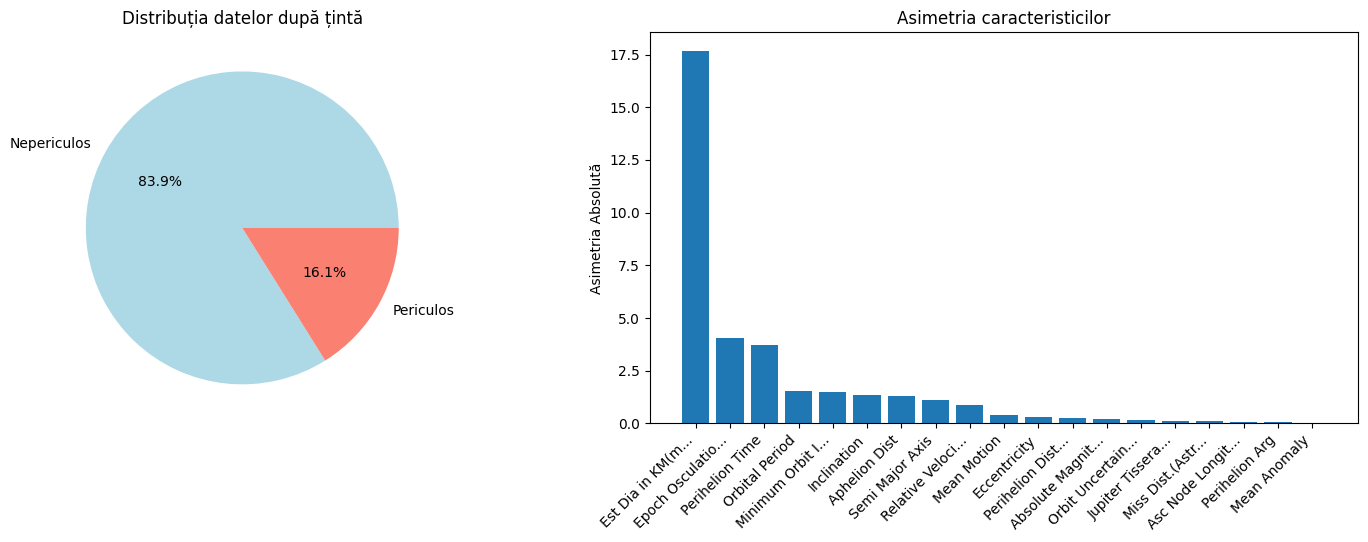

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Distribuția datelor după țintă
axes[0].pie(y.value_counts(), labels=['Nepericulos', 'Periculos'], 
            autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[0].set_title('Distribuția datelor după țintă')

# 2. Asimetria caracteristicilor
numeric_features = X.select_dtypes(include=[np.number]).columns
asimetria = X[numeric_features].skew().abs().sort_values(ascending=False)
axes[1].bar(range(len(asimetria)), asimetria.values)
axes[1].set_xticks(range(len(asimetria)))
axes[1].set_xticklabels([col[:15] + '...' if len(col) > 15 else col 
                         for col in asimetria.index], rotation=45, ha='right')
axes[1].set_ylabel('Asimetria Absolută')
axes[1].set_title('Asimetria caracteristicilor')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


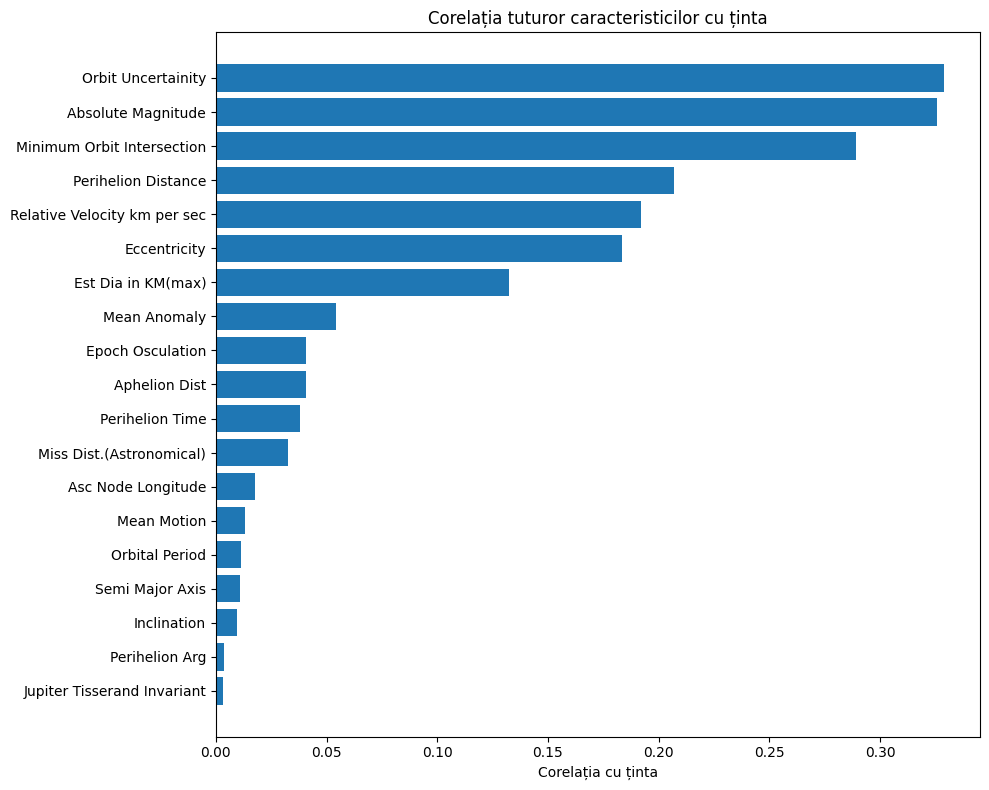

In [47]:
correlations = pd.concat([X, y], axis=1).corr()['Hazardous'].abs().sort_values(ascending=False)[1:]

plt.figure(figsize=(10, 8))
plt.barh(range(len(correlations)), correlations.values)
plt.yticks(range(len(correlations)), 
           [col[:30] + '...' if len(col) > 30 else col for col in correlations.index])
plt.xlabel('Corelația cu ținta')
plt.title('Corelația tuturor caracteristicilor cu ținta')
plt.gca().invert_yaxis() #Cele mai corelate cu ținta sus
plt.tight_layout()
plt.show()


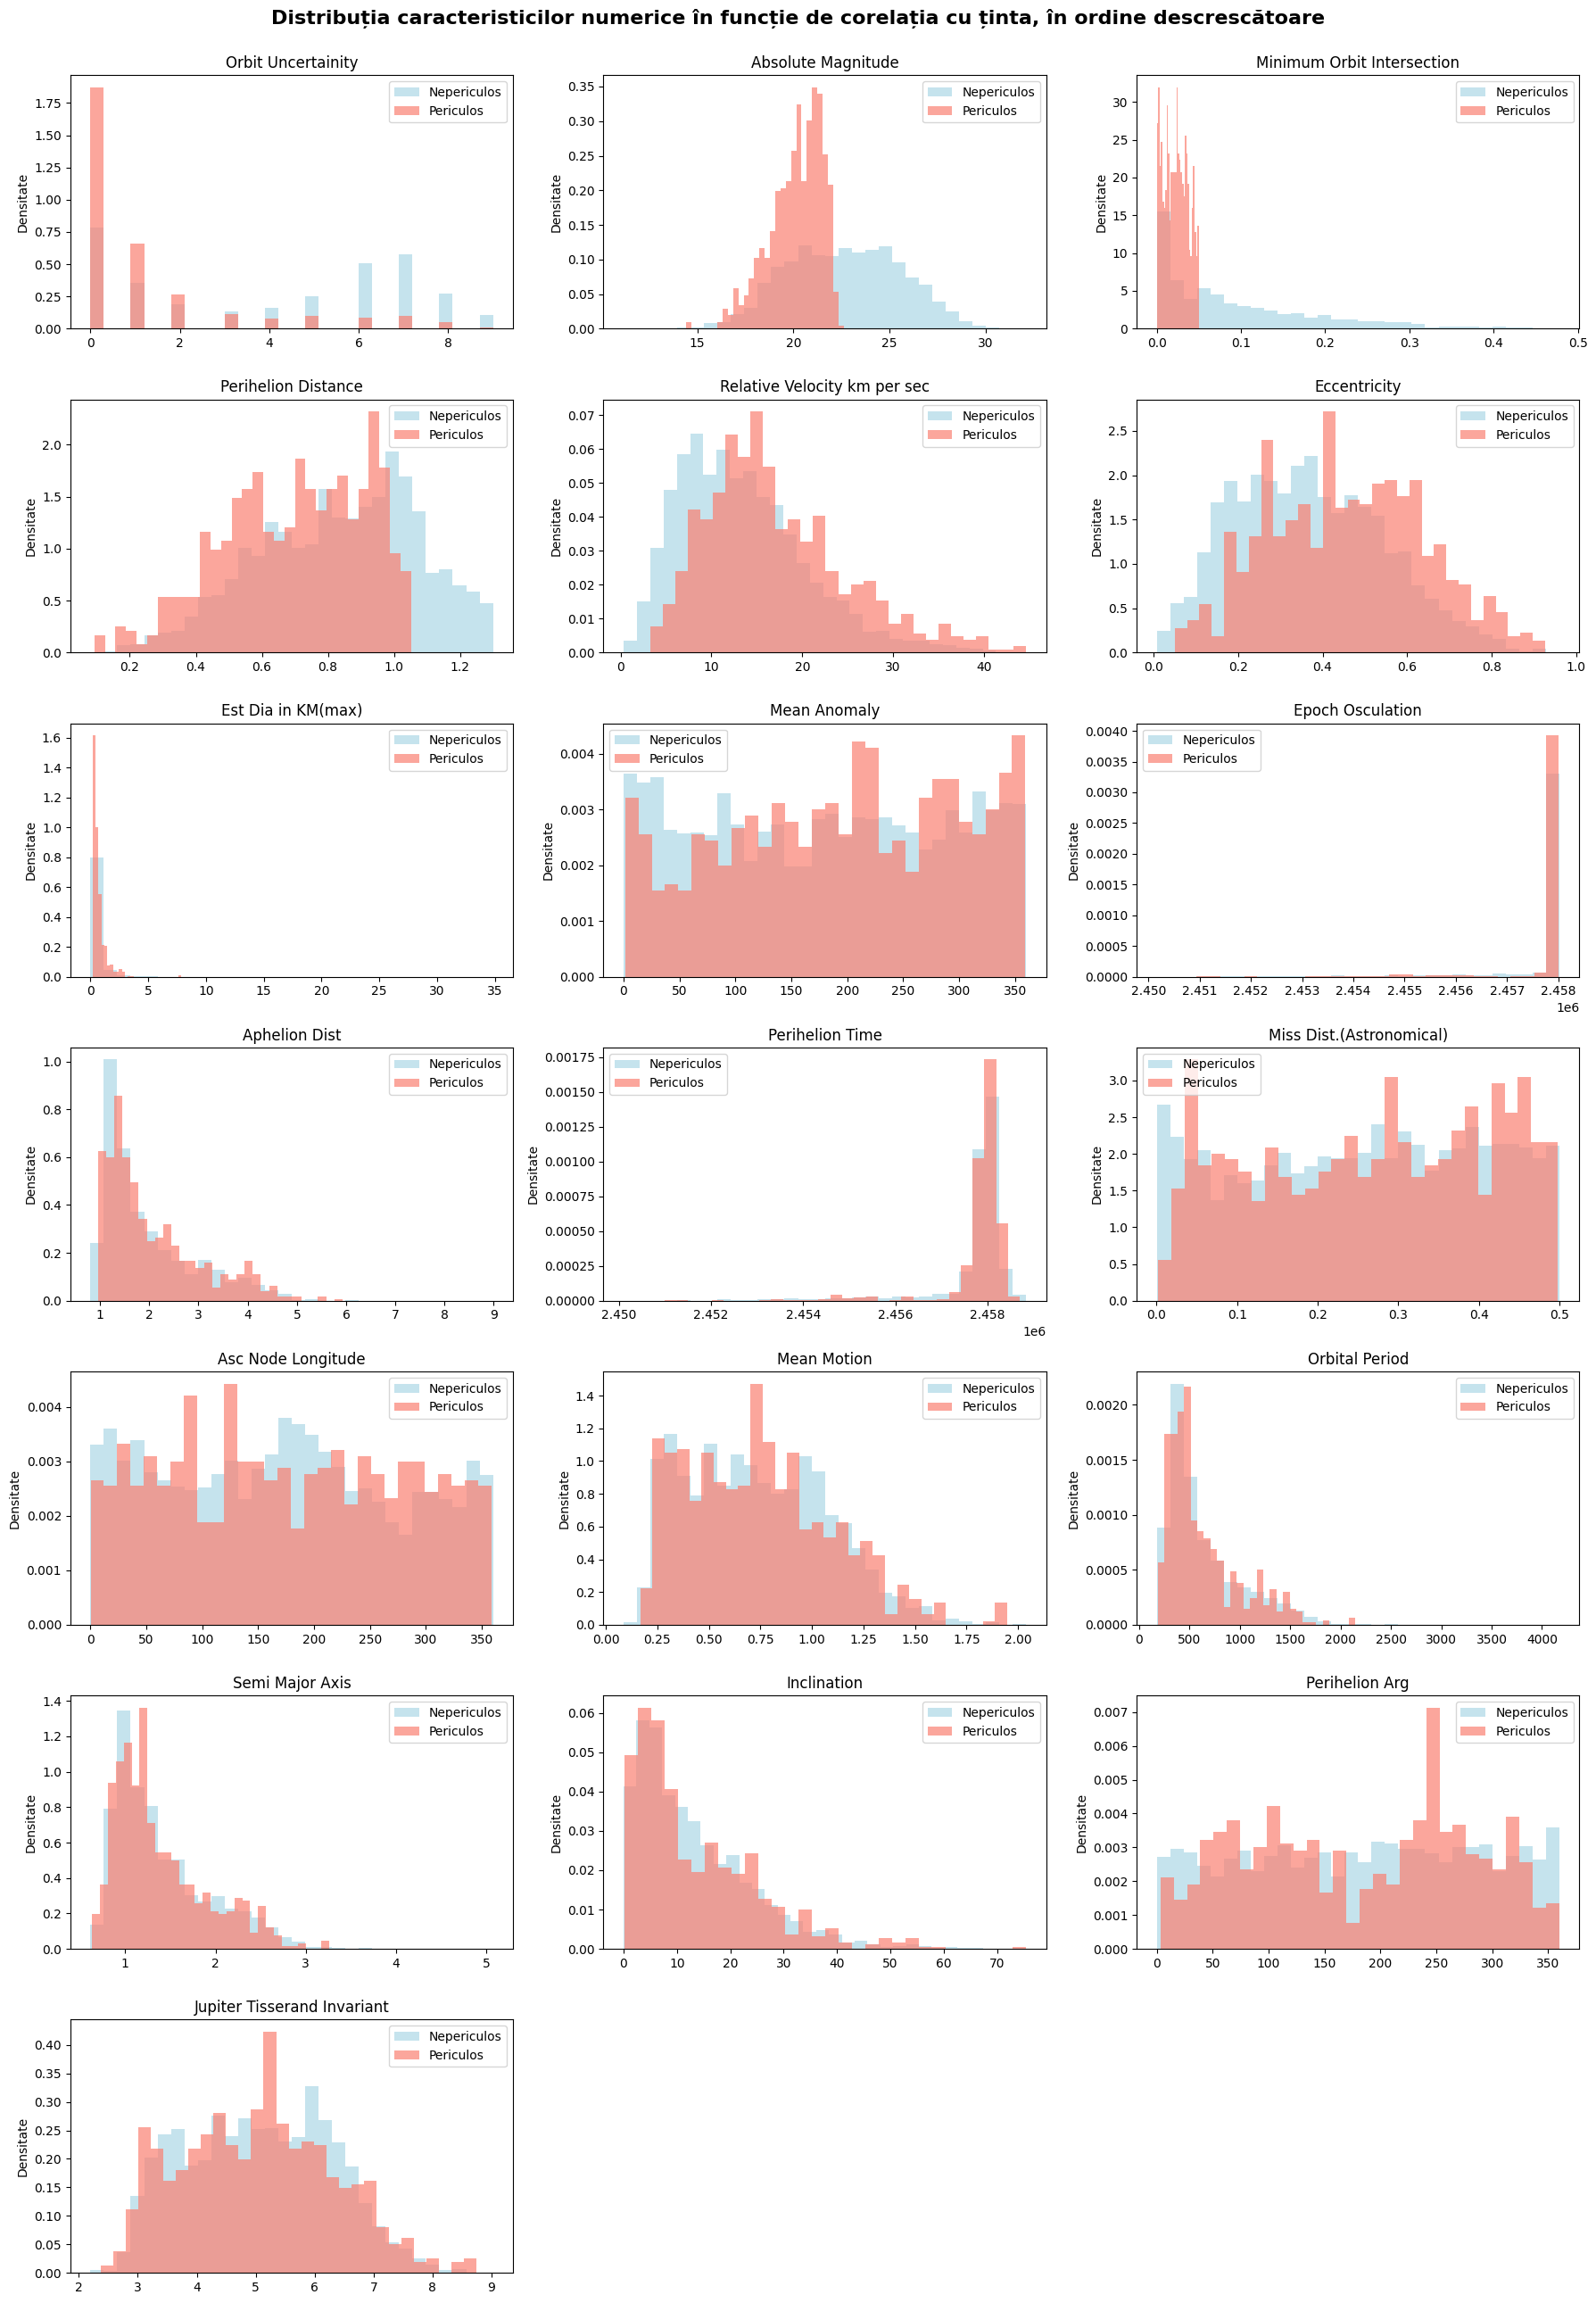

In [48]:
# Calculăm corelațiile cu ținta și sortăm descrescător
correlations = pd.concat([X, y], axis=1).corr()['Hazardous'].abs().sort_values(ascending=False)[1:]
numeric_features_sorted = [feat for feat in correlations.index if feat in X.select_dtypes(include=[np.number]).columns]

num_features = len(numeric_features_sorted)
cols = 3  # număr de coloane în figura de subgrafice
rows = int(np.ceil(num_features / cols))

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
fig.suptitle('Distribuția caracteristicilor numerice în funcție de corelația cu ținta, în ordine descrescătoare', 
             fontsize=16, fontweight='bold', y=0.95)

for i, feature in enumerate(numeric_features_sorted):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if rows > 1 else axes[col]

    hazardous_data = X[y == 1][feature]
    non_hazardous_data = X[y == 0][feature]

    ax.hist(non_hazardous_data, alpha=0.7, label='Nepericulos',
            bins=30, color='lightblue', density=True)
    ax.hist(hazardous_data, alpha=0.7, label='Periculos',
            bins=30, color='salmon', density=True)
    
    ax.set_title(f'{feature[:30]}...' if len(feature) > 30 else feature)
    ax.set_ylabel('Densitate')
    ax.legend()

# Elimină subplot-urile goale (dacă e cazul)
if rows * cols > num_features:
    for j in range(num_features, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


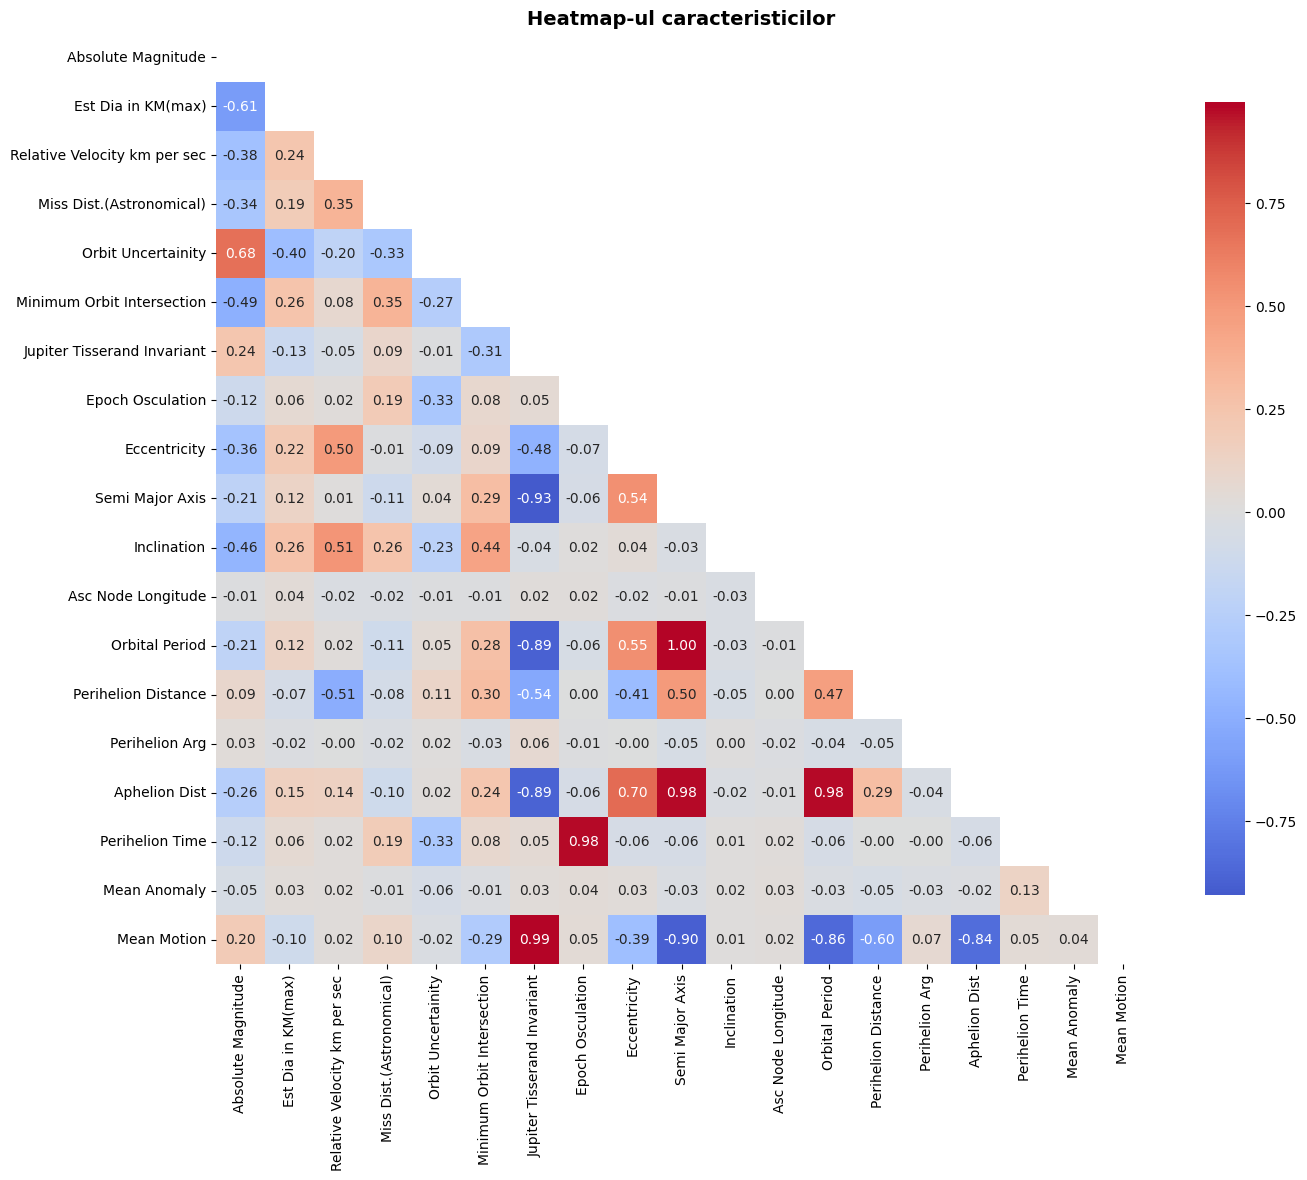

In [49]:
# Heatmap-ul pentru toate caracteristicile
plt.figure(figsize=(14, 12))
corr_matrix = X.corr()

# Crează o mască pentru triunghiul superior (pentru claritate)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Afișează heatmap-ul
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})

# Titlul graficului în română
plt.title('Heatmap-ul caracteristicilor', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Analiza valorilor atipice

In [50]:
Q1 = X.quantile(0.25) # Primul cvartil (25%)
Q3 = X.quantile(0.75) # Al treilea cvartil (75%)
IQR = Q3 - Q1 # Intervalul intercvartilic
outliers = ((X < (Q1 - 3 * IQR)) | (X > (Q3 + 3 * IQR))).sum()
print("Numărul valorilor atipice per caracteristică (>3 IQR):")
for feature, count in outliers[outliers > 0].items():
    print(f"  {feature}: {count} valori atipice ({count/len(X)*100:.1f}%)")

Numărul valorilor atipice per caracteristică (>3 IQR):
  Est Dia in KM(max): 142 valori atipice (3.0%)
  Minimum Orbit Intersection: 5 valori atipice (0.1%)
  Epoch Osculation: 639 valori atipice (13.6%)
  Semi Major Axis: 2 valori atipice (0.0%)
  Inclination: 6 valori atipice (0.1%)
  Orbital Period: 14 valori atipice (0.3%)
  Aphelion Dist: 4 valori atipice (0.1%)
  Perihelion Time: 405 valori atipice (8.6%)


### 5. Alegerea caracteristicilor și compararea metodelor de preprocesare

Împărțirea datelor în seturi de antrenare și testare

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Setul de antrenare: {X_train.shape}")
print(f"Setul de testare: {X_test.shape}")

Setul de antrenare: (3749, 19)
Setul de testare: (938, 19)


Selecția celor mai bune caracteristici bazată pe metode statistice

In [52]:
# Metoda 1: F-statistic
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X_train, y_train)
f_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)
print(f_scores)

                         Feature     F_Score       P_Value
4             Orbit Uncertainity  475.001405  2.994320e-99
0             Absolute Magnitude  458.408735  4.865396e-96
5     Minimum Orbit Intersection  333.107097  2.296390e-71
13           Perihelion Distance  159.719022  6.964754e-36
2   Relative Velocity km per sec  152.551244  2.221032e-34
8                   Eccentricity  122.908910  3.978532e-28
1             Est Dia in KM(max)   67.420916  2.985791e-16
17                  Mean Anomaly   12.358230  4.442468e-04
7               Epoch Osculation   11.710096  6.282757e-04
16               Perihelion Time   10.216176  1.403711e-03
15                 Aphelion Dist    6.750327  9.409755e-03
3       Miss Dist.(Astronomical)    6.630647  1.006191e-02
10                   Inclination    1.426523  2.324083e-01
11            Asc Node Longitude    1.235988  2.663171e-01
18                   Mean Motion    0.468809  4.935779e-01
12                Orbital Period    0.309383  5.780925e-

In [53]:
# Metoda 2: Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X_train, y_train)
mi_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'MI_Score': selector_mi.scores_
}).sort_values('MI_Score', ascending=False)
print('\n',mi_scores)


                          Feature  MI_Score
5     Minimum Orbit Intersection  0.164042
0             Absolute Magnitude  0.129146
1             Est Dia in KM(max)  0.118774
13           Perihelion Distance  0.091518
8                   Eccentricity  0.076768
6    Jupiter Tisserand Invariant  0.076016
15                 Aphelion Dist  0.075027
14                Perihelion Arg  0.067963
4             Orbit Uncertainity  0.066622
11            Asc Node Longitude  0.064405
10                   Inclination  0.063550
12                Orbital Period  0.056707
9                Semi Major Axis  0.056545
18                   Mean Motion  0.056082
17                  Mean Anomaly  0.055169
16               Perihelion Time  0.050285
2   Relative Velocity km per sec  0.024606
7               Epoch Osculation  0.013047
3       Miss Dist.(Astronomical)  0.009758


Din încercări, pentru a limita overfitting-ul, am ales să folosesc 8 caracteristici. Inițial alesesem 7 caracteristici.

In [54]:
n_features = 8

# Combinăm cele mai bune 8 caracteristici din ambele metode
top_f = set(f_scores.head(n_features)['Feature'].tolist())
top_mi = set(mi_scores.head(n_features)['Feature'].tolist())
selected_features = list(top_f.union(top_mi))

selected_features, f_scores, mi_scores = selected_features[:n_features], f_scores, mi_scores

print(f"\nCaracteristicile selectate ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")


Caracteristicile selectate (8):
  1. Eccentricity
  2. Orbit Uncertainity
  3. Minimum Orbit Intersection
  4. Perihelion Arg
  5. Mean Anomaly
  6. Relative Velocity km per sec
  7. Est Dia in KM(max)
  8. Aphelion Dist


In [55]:
selected_features = [
    "Aphelion Dist",
    "Minimum Orbit Intersection",
    "Eccentricity",
    "Perihelion Arg",
    "Est Dia in KM(max)",
    "Relative Velocity km per sec",
    "Perihelion Distance",
    "Jupiter Tisserand Invariant"
]

print(f"\nCaracteristicile selectate manual ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")



Caracteristicile selectate manual (8):
  1. Aphelion Dist
  2. Minimum Orbit Intersection
  3. Eccentricity
  4. Perihelion Arg
  5. Est Dia in KM(max)
  6. Relative Velocity km per sec
  7. Perihelion Distance
  8. Jupiter Tisserand Invariant


Compararea diferitelor scalări

In [56]:
scalers = {
    'No Scaling': None,
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'PowerTransformer': PowerTransformer()
}

scaler_results = {}

# Testarea fiecărui scaler cu un model simplu
test_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"\nRezultatele comparării scalărilor:")
print("-"*50)

for scaler_name, scaler in scalers.items():
    if scaler is None:
        X_train_scaled = X_train[selected_features]
    else:
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train[selected_features]),
            columns=selected_features,
            index=X_train.index
        )
    
    # Cross-validarea
    cv_scores = cross_val_score(test_model, X_train_scaled, y_train, 
                               cv=cv_strategy, scoring='accuracy')
    
    scaler_results[scaler_name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std(),
        'scaler': scaler
    }
    
    print(f"{scaler_name:15}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Rezultatele comparării scalărilor:
--------------------------------------------------


No Scaling     : 0.8170 (+/- 0.0346)
StandardScaler : 0.7751 (+/- 0.0357)
RobustScaler   : 0.7773 (+/- 0.0325)
MinMaxScaler   : 0.7061 (+/- 0.0251)
PowerTransformer: 0.9005 (+/- 0.0266)


Alegerea celei mai bune scalări

In [57]:
best_scaler_name = 'PowerTransformer'#max(scaler_results.keys(), key=lambda x: scaler_results[x]['mean_cv_score'])
best_scaler = scaler_results[best_scaler_name]['scaler']

print(f"\nCea mai bună scalare: {best_scaler_name}")

# Aplicarea celei mai bune scalări
if best_scaler is None:
    X_train_final = X_train[selected_features]
    X_test_final = X_test[selected_features]
else:
    X_train_final = pd.DataFrame(
        best_scaler.fit_transform(X_train[selected_features]),
        columns=selected_features,
        index=X_train.index
    )
    X_test_final = pd.DataFrame(
        best_scaler.transform(X_test[selected_features]),
        columns=selected_features,
        index=X_test.index
    )


Cea mai bună scalare: PowerTransformer


### 6. Modelare de învățare automata

Alegerea modelelor. Aici modelul XGBoost a fost adugat datorită Notebook-ului realizat de utilizatorul plavak10[4] pe platforma Koogle[5], văzând că el cu acest model a finalizat implementarea.

In [58]:
models = {
    'Logistic Regression': LogisticRegression(
        class_weight='balanced', random_state=42, max_iter=1000
    ),
    'SVM (RBF)': SVC(
        class_weight='balanced', probability=True, random_state=42, 
        C=1.0, gamma='scale'
    ),
    'SVM (Linear)': SVC(
        class_weight='balanced', probability=True, random_state=42, 
        kernel='linear', C=1.0
    ),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5, weights='distance'
    ),
    'Decision Tree': DecisionTreeClassifier(
        class_weight='balanced', random_state=42, 
        max_depth=10, min_samples_split=20
    ),
    'Random Forest': RandomForestClassifier(
        class_weight='balanced', n_estimators=100, random_state=42,
        max_depth=15, min_samples_split=10, min_samples_leaf=5
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, random_state=42, 
        max_depth=6, learning_rate=0.1
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100, random_state=42, learning_rate=1.0
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100, random_state=42, 
        max_depth=6, learning_rate=0.1
    )
}

print(models.keys())

dict_keys(['Logistic Regression', 'SVM (RBF)', 'SVM (Linear)', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost'])


Antrenarea și evaluarea tuturor modelor

In [59]:
results = {}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print("\n" + "=" * 60)
    print(f"\n{name}:")
    print("-" * (len(name) + 1))
    
    # Cross-validarea
    cv_scores = cross_val_score(model, X_train_final, y_train, 
                               cv=cv_strategy, scoring='accuracy')
    
    # Antrenarea pe setul de învățare complet
    model.fit(X_train_final, y_train)
    
    # Preziceri
    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrici
    test_accuracy = (y_pred == y_test).mean()
    test_roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Stocarea rezultatelor
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy,
        'test_roc_auc': test_roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'model': model
    }
    
    print(f"Acuratețea CV: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Acuratețea testării: {test_accuracy:.4f}")
    if test_roc_auc:
        print(f"Test ROC-AUC: {test_roc_auc:.4f}")



Logistic Regression:
--------------------
Acuratețea CV: 0.9005 (+/- 0.0266)
Acuratețea testării: 0.8998
Test ROC-AUC: 0.9679


SVM (RBF):
----------
Acuratețea CV: 0.9477 (+/- 0.0225)
Acuratețea testării: 0.9627
Test ROC-AUC: 0.9968


SVM (Linear):
-------------
Acuratețea CV: 0.8962 (+/- 0.0237)
Acuratețea testării: 0.8987
Test ROC-AUC: 0.9671


Naive Bayes:
------------
Acuratețea CV: 0.9274 (+/- 0.0133)
Acuratețea testării: 0.9328
Test ROC-AUC: 0.9866


K-Nearest Neighbors:
--------------------
Acuratețea CV: 0.9579 (+/- 0.0099)
Acuratețea testării: 0.9616
Test ROC-AUC: 0.9852


Decision Tree:
--------------
Acuratețea CV: 0.9923 (+/- 0.0049)
Acuratețea testării: 0.9957
Test ROC-AUC: 0.9967


Random Forest:
--------------
Acuratețea CV: 0.9944 (+/- 0.0085)
Acuratețea testării: 0.9968
Test ROC-AUC: 0.9999


Gradient Boosting:
------------------
Acuratețea CV: 0.9955 (+/- 0.0043)
Acuratețea testării: 0.9957
Test ROC-AUC: 1.0000


AdaBoost:
---------
Acuratețea CV: 0.9955 (+/- 0.004

### 7. Compararea și validarea modelelor

Crearea unui DataFrame cu toate rezultatele

In [60]:
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Model': name,
        'CV_Mean': result['cv_mean'],
        'CV_Std': result['cv_std'],
        'Test_Accuracy': result['test_accuracy'],
        'ROC_AUC': result['test_roc_auc'] if result['test_roc_auc'] else 0,
        'Overfitting': result['cv_mean'] - result['test_accuracy']
    })

results_df = pd.DataFrame(comparison_data).sort_values('Test_Accuracy', ascending=False)
print("Compararea performanțelor modelelor:")
print(results_df.round(4))

Compararea performanțelor modelelor:
                 Model  CV_Mean  CV_Std  Test_Accuracy  ROC_AUC  Overfitting
9              XGBoost   0.9955  0.0032         0.9979   1.0000      -0.0024
6        Random Forest   0.9944  0.0042         0.9968   0.9999      -0.0024
8             AdaBoost   0.9955  0.0025         0.9957   1.0000      -0.0003
7    Gradient Boosting   0.9955  0.0022         0.9957   1.0000      -0.0003
5        Decision Tree   0.9923  0.0024         0.9957   0.9967      -0.0035
1            SVM (RBF)   0.9477  0.0113         0.9627   0.9968      -0.0150
4  K-Nearest Neighbors   0.9579  0.0050         0.9616   0.9852      -0.0038
3          Naive Bayes   0.9274  0.0067         0.9328   0.9866      -0.0054
0  Logistic Regression   0.9005  0.0133         0.8998   0.9679       0.0007
2         SVM (Linear)   0.8962  0.0119         0.8987   0.9671      -0.0025


Vizualizarea comparării performanțelor modelelor

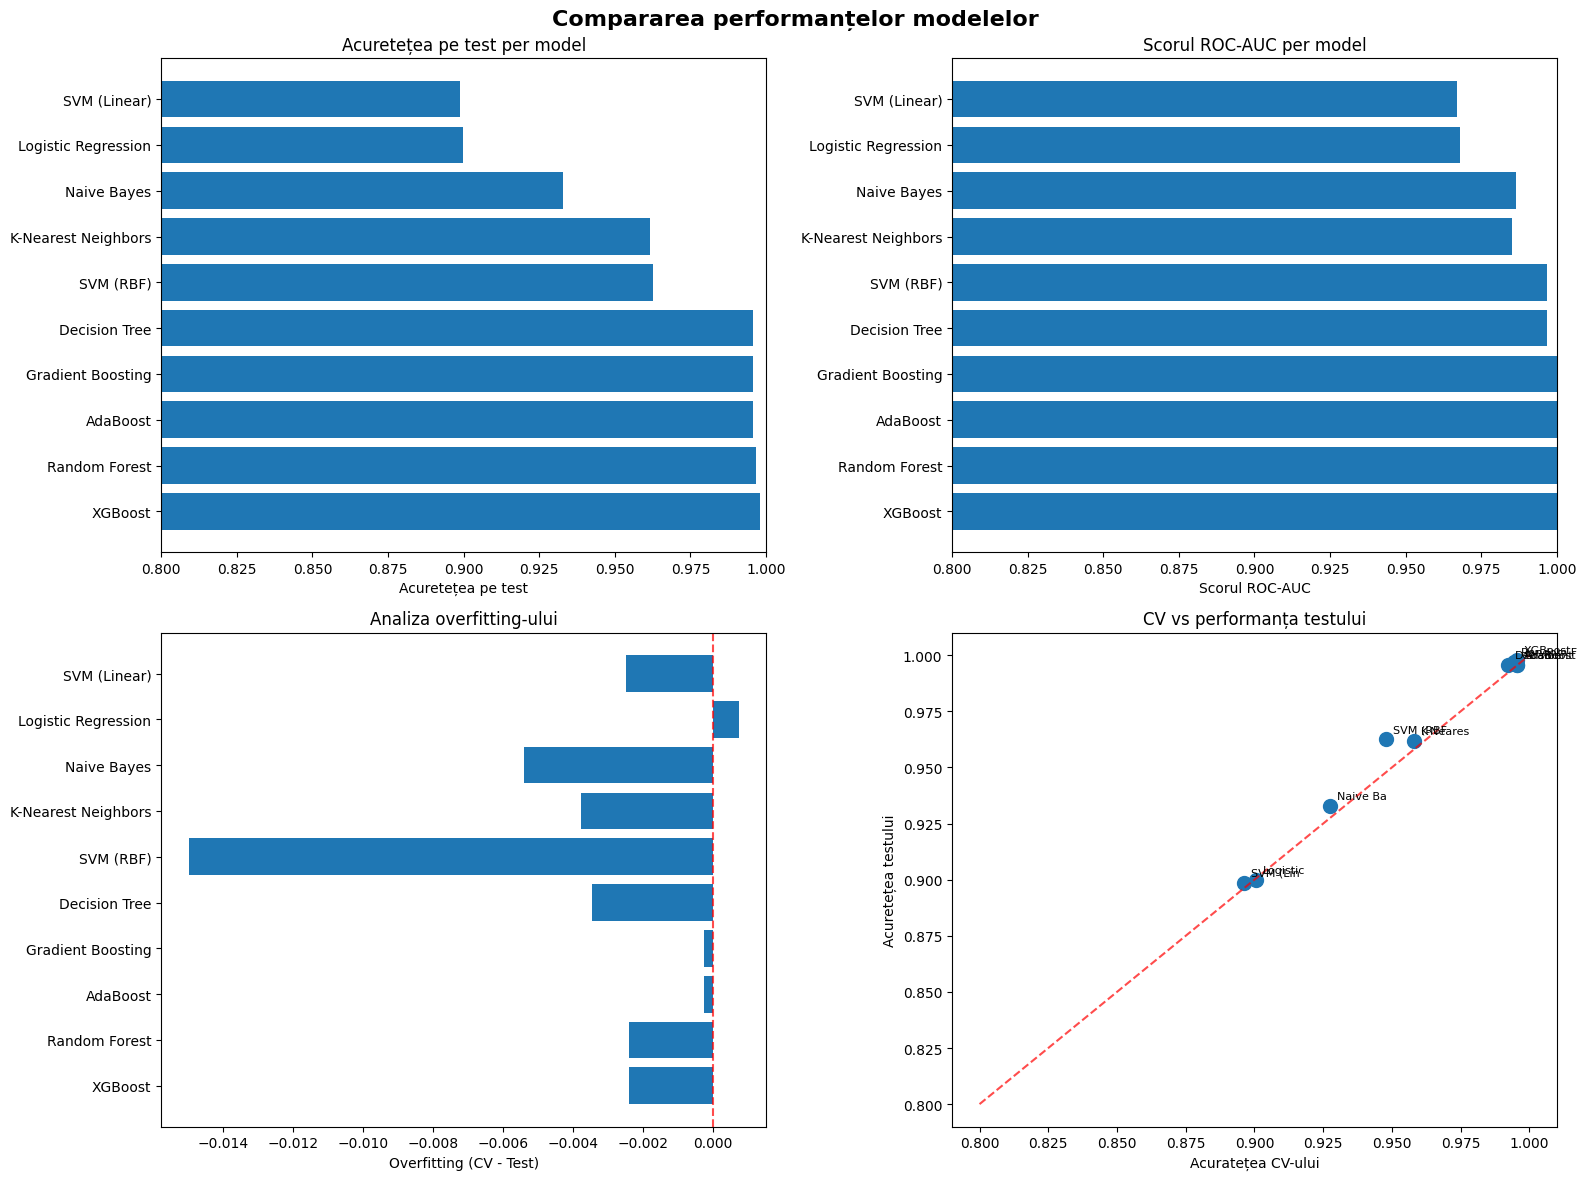

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Compararea performanțelor modelelor', fontsize=16, fontweight='bold')

# 1. Compararea acurateții pe setul de test
axes[0, 0].barh(results_df['Model'], results_df['Test_Accuracy'])
axes[0, 0].set_xlabel('Acuretețea pe test')
axes[0, 0].set_title('Acuretețea pe test per model')
axes[0, 0].set_xlim(0.8, 1.0)

# 2. Compararea ROC-AUC
roc_data = results_df[results_df['ROC_AUC'] > 0]
axes[0, 1].barh(roc_data['Model'], roc_data['ROC_AUC'])
axes[0, 1].set_xlabel('Scorul ROC-AUC')
axes[0, 1].set_title('Scorul ROC-AUC per model')
axes[0, 1].set_xlim(0.8, 1.0)

# 3. Analiza overfitting-ului
axes[1, 0].barh(results_df['Model'], results_df['Overfitting'])
axes[1, 0].set_xlabel('Overfitting (CV - Test)')
axes[1, 0].set_title('Analiza overfitting-ului')
axes[1, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)

# 4. CV Score vs Test Score
axes[1, 1].scatter(results_df['CV_Mean'], results_df['Test_Accuracy'], s=100)
for i, model in enumerate(results_df['Model']):
    axes[1, 1].annotate(model[:8], 
                       (results_df.iloc[i]['CV_Mean'], results_df.iloc[i]['Test_Accuracy']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].plot([0.8, 1.0], [0.8, 1.0], 'r--', alpha=0.7)
axes[1, 1].set_xlabel('Acuratețea CV-ului')
axes[1, 1].set_ylabel('Acuretețea testului')
axes[1, 1].set_title('CV vs performanța testului')

plt.tight_layout()
plt.show()

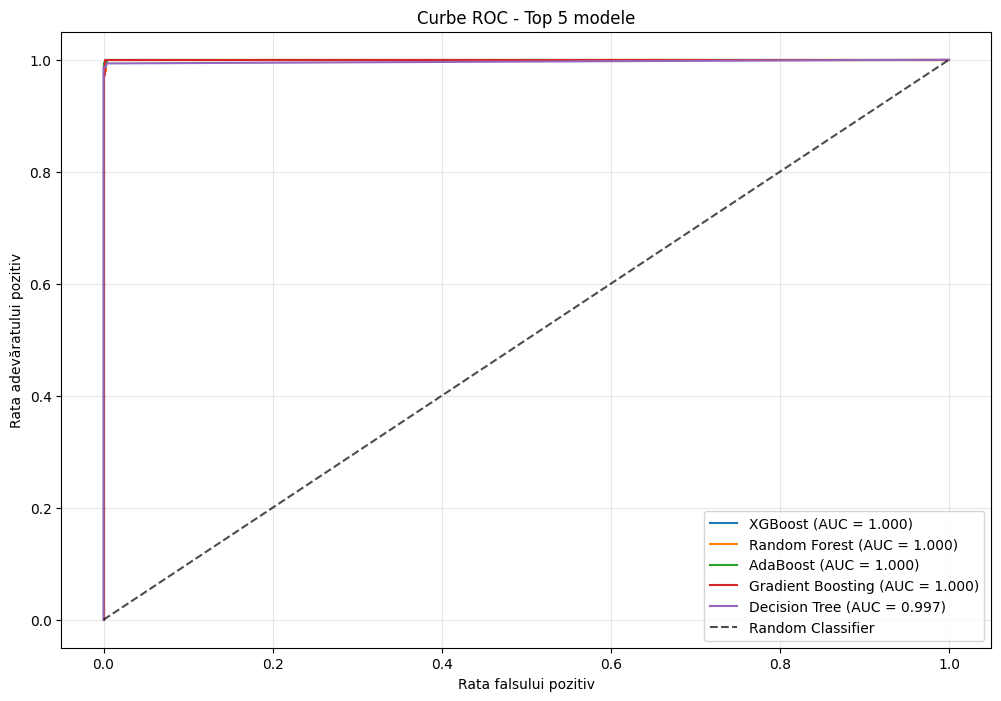

In [62]:
# ROC Curves for top models
plt.figure(figsize=(12, 8))
top_models = results_df.head(5)['Model'].tolist()

for model_name in top_models:
    if results[model_name]['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['y_pred_proba'])
        auc_score = results[model_name]['test_roc_auc']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.7, label='Random Classifier')
plt.xlabel('Rata falsului pozitiv')
plt.ylabel('Rata adevăratului pozitiv')
plt.title('Curbe ROC - Top 5 modele')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Curbele de învățare pentru toate modelele

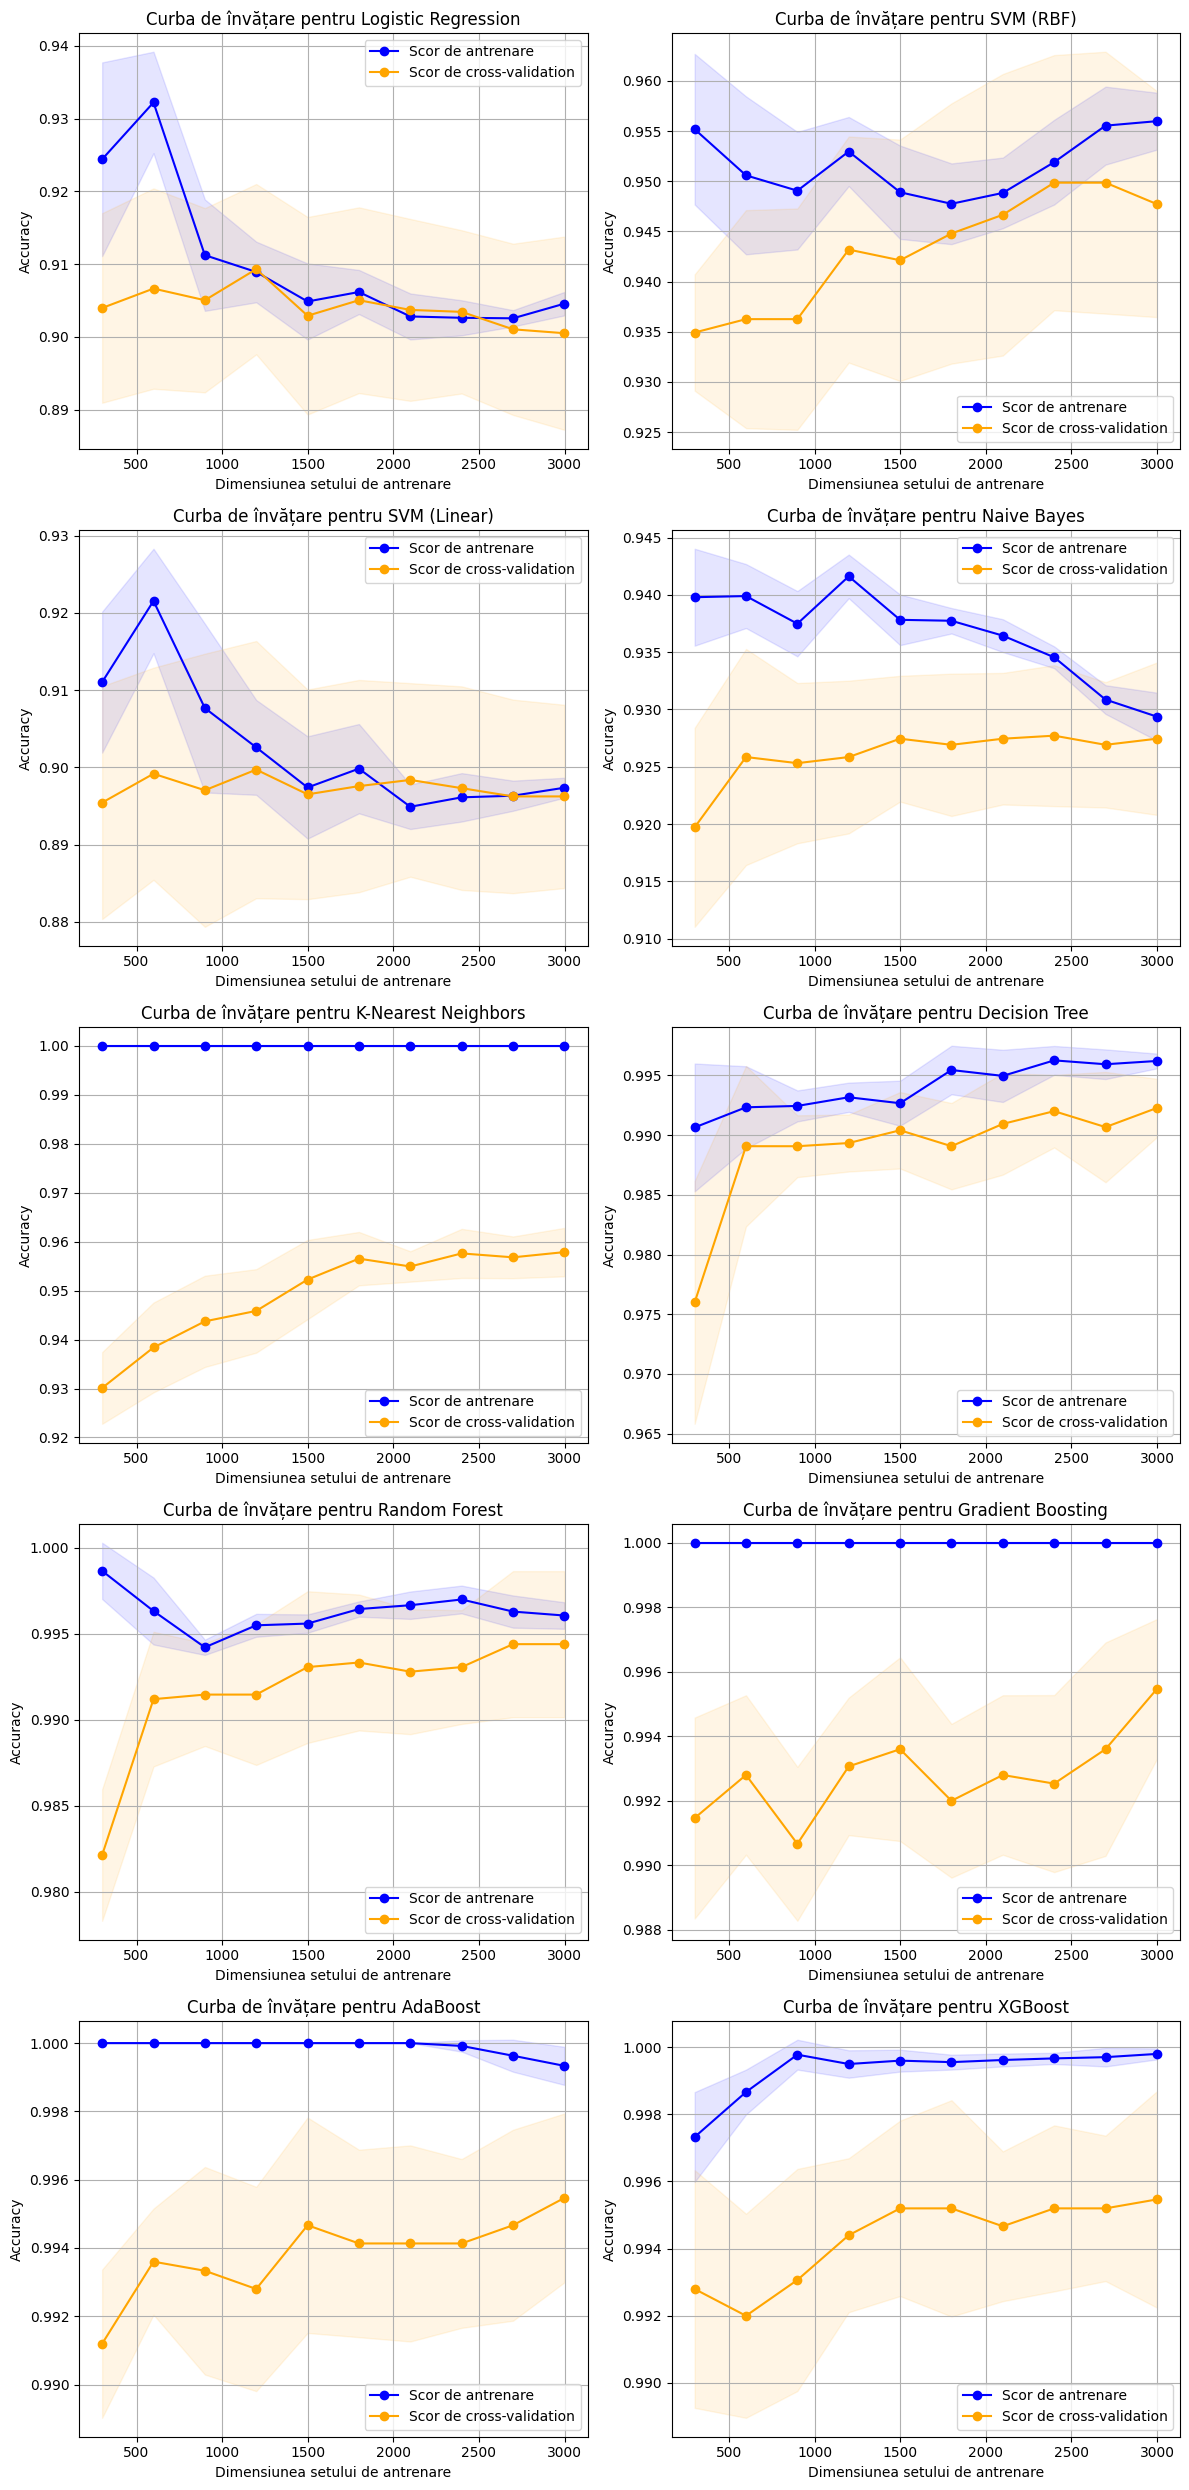

In [63]:
def plot_learning_curve_grid(models, X, y, cv=5, scoring='accuracy', n_jobs=-1):
    n_models = len(models)
    n_cols = 2
    n_rows = (n_models + 1) // n_cols  # Numărul de rânduri necesar

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
    axes = axes.flatten()  # Comprimat în cazul mai multor rânduri

    for idx, (model_name, estimator) in enumerate(models.items()):
        train_sizes, train_scores, valid_scores = learning_curve(
            estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs,
            train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)
        
        ax = axes[idx]
        ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Scor de antrenare')
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

        ax.plot(train_sizes, valid_mean, 'o-', color='orange', label='Scor de cross-validation')
        ax.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='orange')

        ax.set_title(f"Curba de învățare pentru {model_name}")
        ax.set_xlabel('Dimensiunea setului de antrenare')
        ax.set_ylabel(scoring.capitalize())
        ax.legend(loc='best')
        ax.grid(True)
    
    # Dacă sunt subploțiuri goale, le ascundem
    for j in range(idx + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_learning_curve_grid(models, X_train_final, y_train, cv=cv_strategy)

Matricea de confuzie

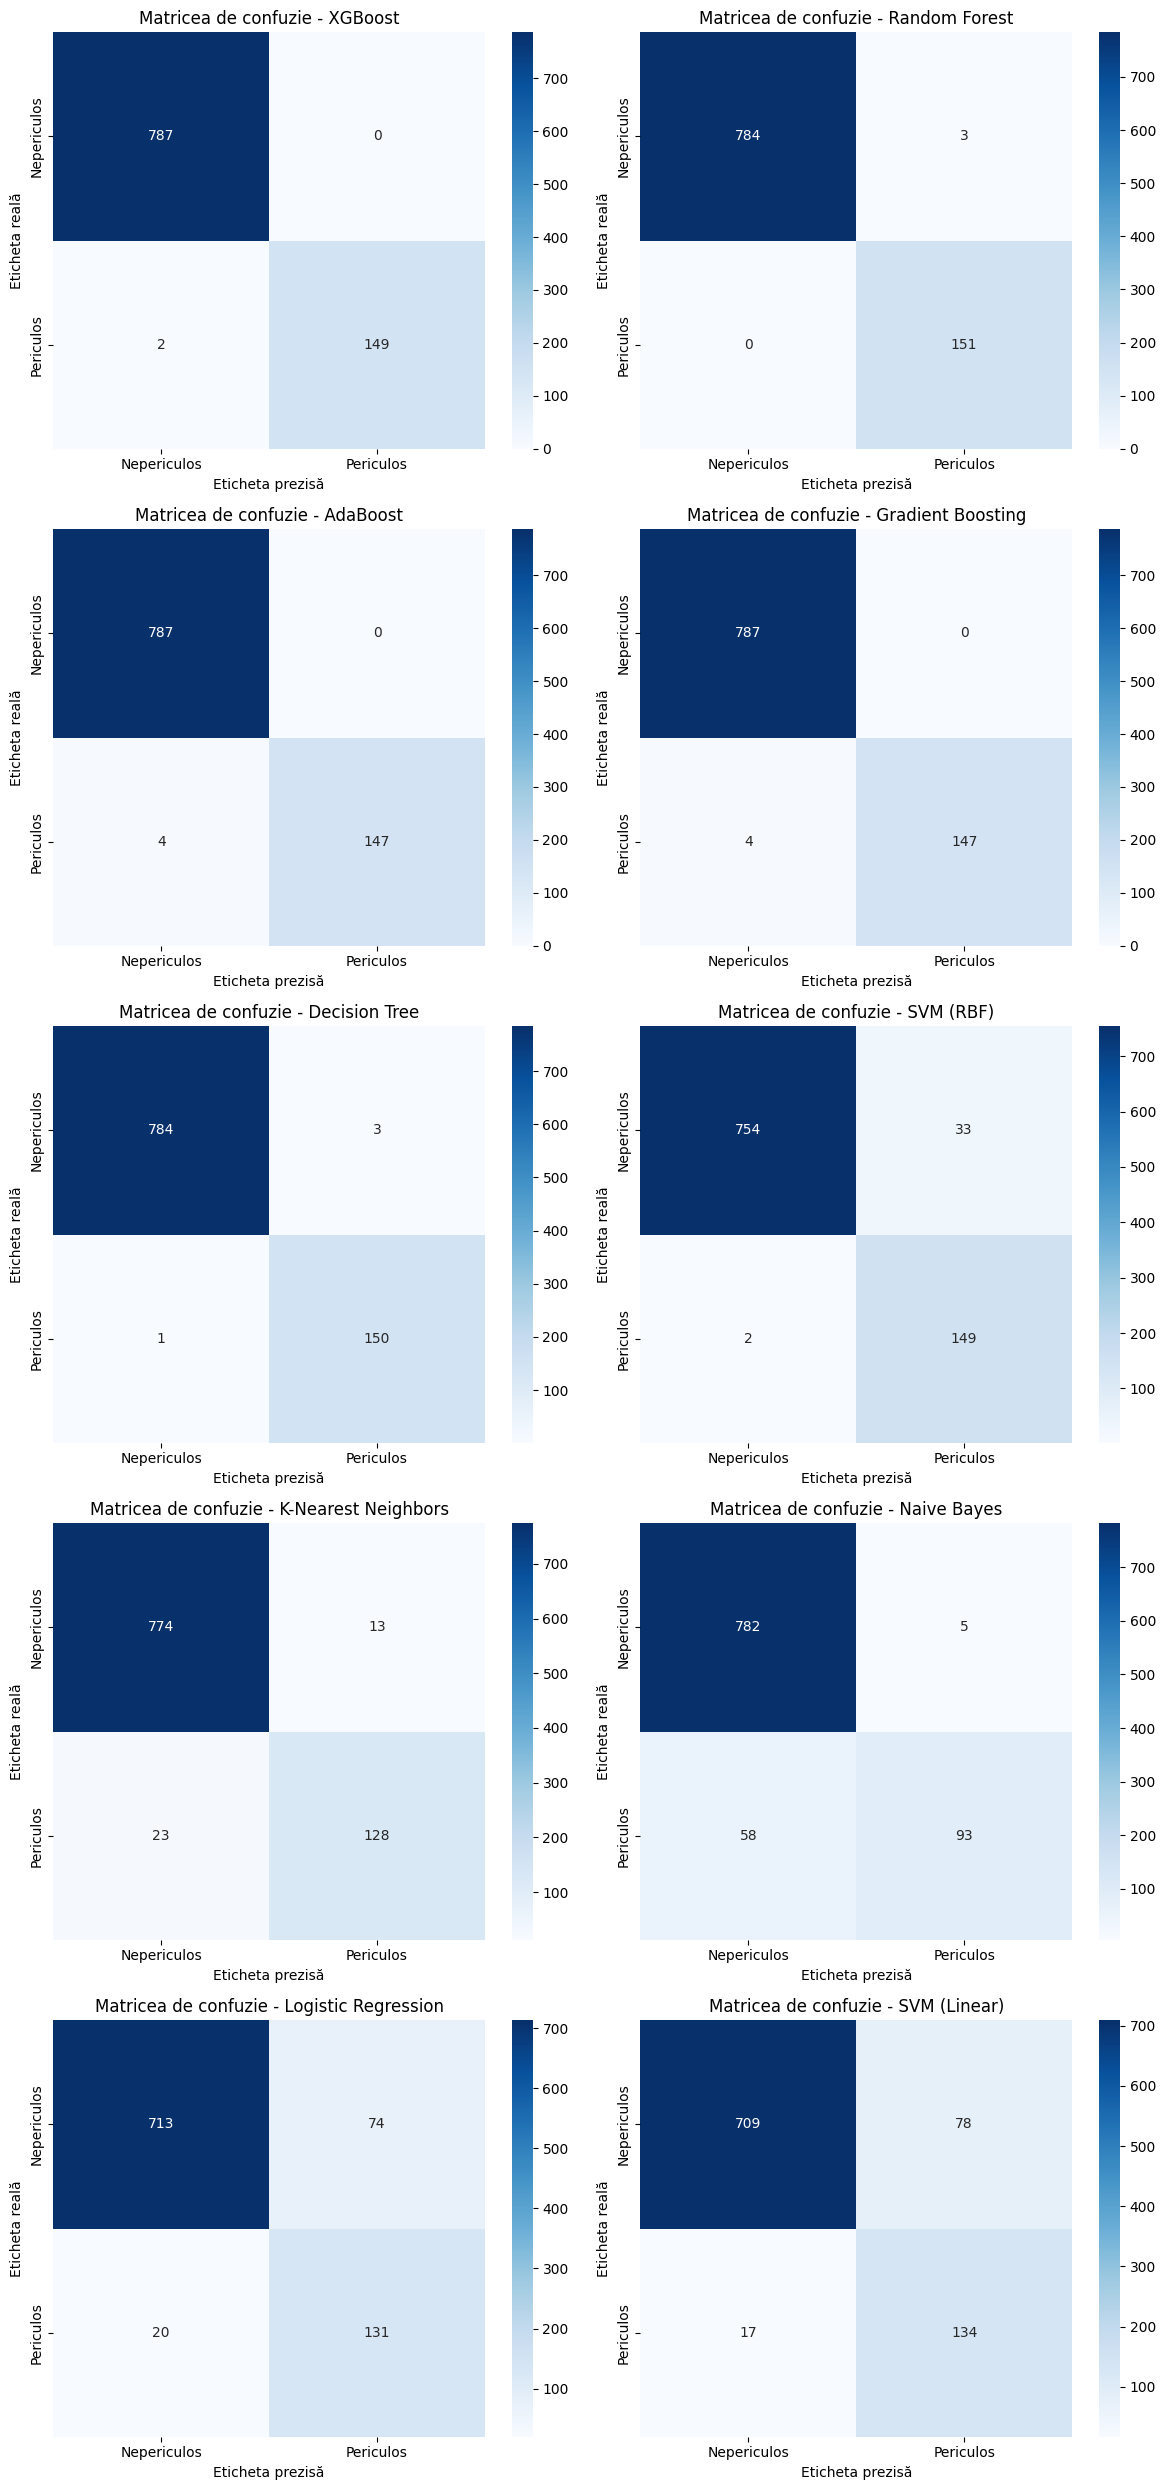

In [64]:
n_models = len(results_df)
n_cols = 2
n_rows = math.ceil(n_models / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 5))  # Ajustarea per total al dimensiunilor figurii

for idx, model_name in enumerate(results_df['Model']):
    y_pred = results[model_name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Nepericulos', 'Periculos'],
                yticklabels=['Nepericulos', 'Periculos'])
    plt.title(f'Matricea de confuzie - {model_name}')
    plt.ylabel('Eticheta reală')
    plt.xlabel('Eticheta prezisă')

plt.tight_layout()
plt.show()

Alegerea celui mai bun model

In [65]:
best_model_name = 'Random Forest'
best_model_result = results[best_model_name]

print(f"\nCel mai bun model: {best_model_name}")
print("="*50)
print(f"Acuratețea testării: {best_model_result['test_accuracy']:.4f}")
print(f"ROC-AUC: {best_model_result['test_roc_auc']:.4f}")
print(f"Acuratețea CV-ului: {best_model_result['cv_mean']:.4f} (+/- {best_model_result['cv_std']*2:.4f})")

print("\nRaport de clasificare detaliat:")
print(classification_report(y_test, best_model_result['y_pred']))


Cel mai bun model: Random Forest
Acuratețea testării: 0.9968
ROC-AUC: 0.9999
Acuratețea CV-ului: 0.9944 (+/- 0.0085)

Raport de clasificare detaliat:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       0.98      1.00      0.99       151

    accuracy                           1.00       938
   macro avg       0.99      1.00      0.99       938
weighted avg       1.00      1.00      1.00       938



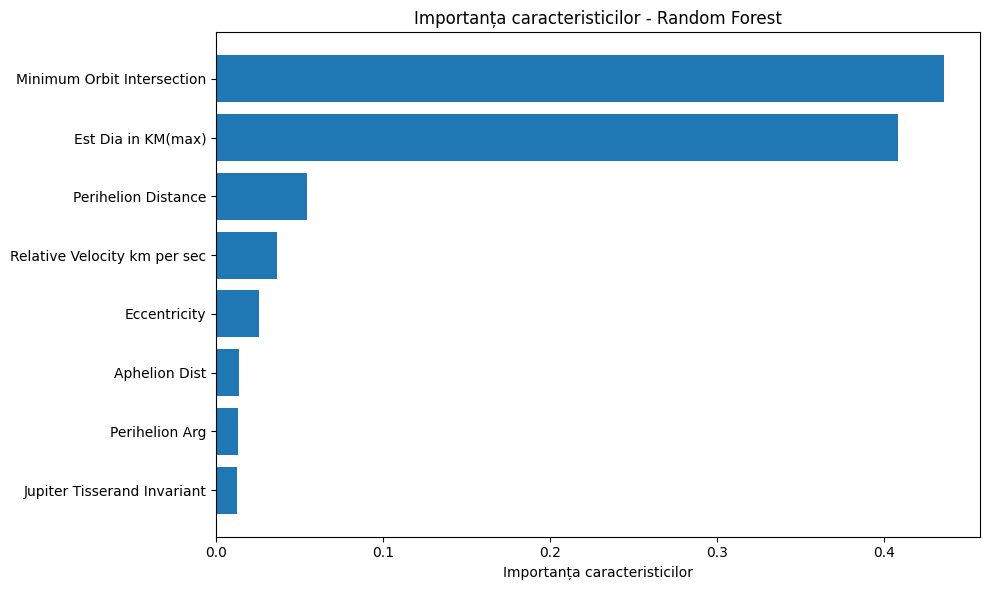

(3749, 8)
(3749,)


In [66]:
# Importanța caracteristicilor (dacă sunt disponibile)
if hasattr(best_model_result['model'], 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': best_model_result['model'].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Importanța caracteristicilor')
    plt.title(f'Importanța caracteristicilor - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print(X_train_final.shape)
print(y_train.shape)

### 8. Implementarea

Ultima evaluare

In [67]:
# Hyperparameter tuning pentru cel mai bun model
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 5]
    }
elif best_model_name == 'SVM (RBF)':
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
else:
    param_grid = {}

if param_grid:
    print(f"Performing hyperparameter tuning for {best_model_name}...")
    
    base_model = models[best_model_name]
    grid_search = GridSearchCV(
        base_model, param_grid, cv=3, scoring='accuracy', 
        n_jobs=-1, verbose=0
    )
    
    grid_search.fit(X_train_final, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    
    # Stadiul final al modelului
    final_model = grid_search.best_estimator_
else:
    final_model = best_model_result['model']

final_pred = final_model.predict(X_test_final)
final_accuracy = (final_pred == y_test).mean()

print(f"\nPerformanța finală a modelului:\n")
print(f"Ultimul test de acuratețe: {final_accuracy:.4f}")

if hasattr(final_model, 'predict_proba'):
    final_proba = final_model.predict_proba(X_test_final)[:, 1]
    final_auc = roc_auc_score(y_test, final_proba)
    print(f"Ultimul test de ROC-AUC: {final_auc:.4f}")

print("\n\nRaportul final de clasificare:")
print(classification_report(y_test, final_pred))

Performing hyperparameter tuning for Random Forest...
Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: 0.9957

Performanța finală a modelului:

Ultimul test de acuratețe: 0.9979
Ultimul test de ROC-AUC: 1.0000


Raportul final de clasificare:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       0.99      1.00      0.99       151

    accuracy                           1.00       938
   macro avg       0.99      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



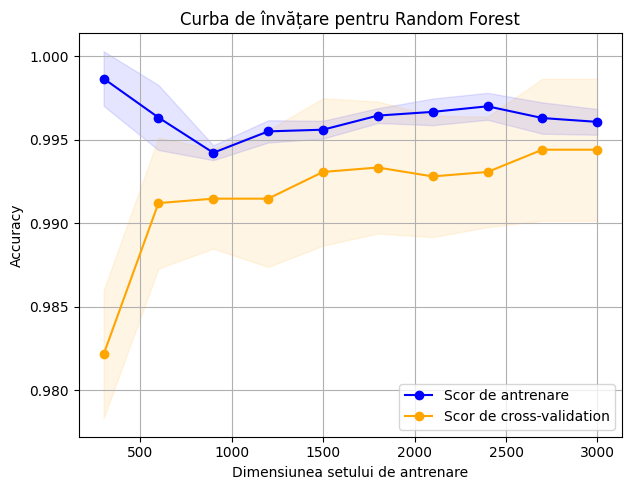

In [68]:
best_model = {}
best_model['Random Forest'] = models['Random Forest']
plot_learning_curve_grid(best_model, X_train_final, y_train, cv=cv_strategy)

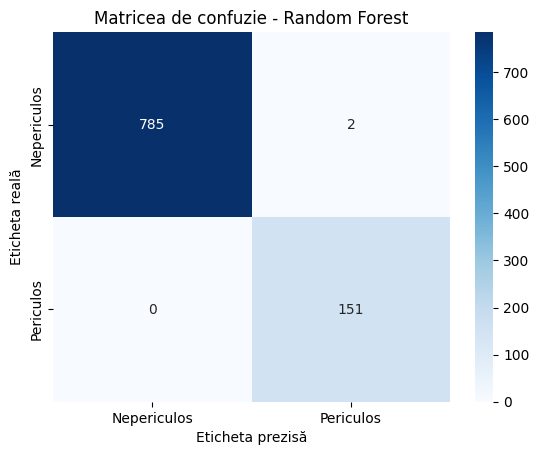

In [69]:
cm = confusion_matrix(y_test, final_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Nepericulos', 'Periculos'],
            yticklabels=['Nepericulos', 'Periculos'])
plt.title('Matricea de confuzie - Random Forest')
plt.ylabel('Eticheta reală')
plt.xlabel('Eticheta prezisă')

plt.show()

Implementarea efectivă

In [70]:
joblib.dump(final_model, "asteroid_model.pkl")
joblib.dump(best_scaler, "scaler.pkl")

['scaler.pkl']

Testarea mini-aplicației independente

In [71]:
import aplicatie_Crainiciuc_Filaret_Niculai as app

# Primele 10 observații sunt chiar din dataset, iar ultimele sunt generate de ChatGPT
# Ordinea valorilor corecte/sugerate de ChatGPT este:
#
# Periculos      1.
# Periculos      2.
# Periculos      3.
# Periculos      4.
# Periculos      5.
# Nepericulos    6.
# Nepericulos    7.
# Nepericulos    8.
# Nepericulos    9.
# Nepericulos    10.
#
# Periculos      11.
# Nepericulos    12.
# Periculos      13.
# Periculos      14.
# Nepericulos    15.
# Nepericulos    16.


input_data = """
1.290446,0.035523,0.412095,211.130108,0.450858,17.071768,0.537258,6.454
3.632314,0.038299,0.603479,286.455638,0.820427,25.395431,0.898228,3.346
1.191069,0.001793,0.235798,252.334226,0.342011,15.874281,0.736541,6.220
1.783220,0.018843,0.497346,134.878572,0.899580,11.244177,0.598621,5.199
2.293102,0.025757,0.559761,285.859380,3.342258,19.179113,0.647222,4.415
1.261097,0.121410,0.279491,34.470771,0.682402,13.084256,0.710150,6.090
3.591294,0.236907,0.603279,276.466281,0.517654,27.424918,0.888642,3.158
1.048520,0.051852,0.047854,327.973239,0.124177,19.123430,0.952751,5.976
5.291914,0.381816,0.611155,218.504766,0.326618,30.994787,1.277179,2.196
2.823943,0.298510,0.635693,359.929822,0.714562,16.998229,0.628959,3.861
2.1,0.045,0.62,210.0,0.95,23.5,0.79,3.0
1.1,0.17,0.22,67.4,0.2,8.5,0.85,6.3
1.3,0.033,0.58,145.2,1.2,27.0,0.55,2.85
3.5,0.011,0.66,310.5,0.75,29.1,0.7,3.2
5.2,0.19,0.41,102.0,0.3,14.8,2.1,5.6
2.8,0.25,0.34,250.3,0.4,11.2,1.9,4.9
"""

with open("sample_input.txt", "w") as f:
    f.write(input_data.strip())

app.predict_from_file()

Periculos
Periculos
Periculos
Periculos
Periculos
Nepericulos
Nepericulos
Nepericulos
Nepericulos
Nepericulos
Periculos
Nepericulos
Periculos
Periculos
Nepericulos
Nepericulos


### 9. Concluzii

Rezultatele au arătat faptul că modelele bazate pe ansambluri de arbori de decizie, în special XGBoost și Random Forest, au oferit cele mai bune performanțe, cu acuratețe de peste 99% și scoruri ROC-AUC de 1, sau aproape de 1. XGBoost a obținut cea mai mare acuratețe (99,79%), dar Random Forest a fost preferat ca model final, deoarece, deși a avut același număr de erori ca XGBoost, a produs mai puține falsuri negative, ceea ce este foarte important în contextul acestei probleme de recunoaștere a asteroizilor potențial periculoși. Modelele liniare, precum regresia logistică și SVM linear, au avut performanțe inferioare (aproximativ 89-90%), sugerând că relația dintre caracteristicile asteroizilor și riscul pe care îl prezintă nu este liniară.

### 10. Referințe

1. [ChatGPT](https://chatgpt.com)
2. [Claude](https://claude.ai)
3. [NASA Astroid Classification Dataset](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification/data?select=nasa.csv)
4. [plavak10](https://www.kaggle.com/code/plavak10/nasa-asteroid-classification)
5. [Kaggle](https://www.kaggle.com)

### 11. Anexa

Acesta este codul generat de către Claude, după mai multe iterații, de unde s-a continuat rezolvarea problemei prin modificarea lui și împărțire codului în secțiunile care apar în acest Notebook.

In [72]:
# # NASA Asteroids Classification - Complete Machine Learning Analysis
# # =================================================================

# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
# from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# import warnings
# warnings.filterwarnings('ignore')

# # Set plotting style
# plt.style.use('default')
# sns.set_palette("husl")

# print("🚀 NASA ASTEROIDS HAZARD CLASSIFICATION")
# print("="*80)
# print("Dataset: NASA Asteroids Classification")
# print("Source: https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification")
# print("="*80)

# # =================================================================
# # 1. PROBLEM DESCRIPTION
# # =================================================================

# print("\n📋 1. PROBLEM DESCRIPTION")
# print("-"*50)
# print("""
# OBJECTIVE: 
# Classify Near-Earth Objects (NEOs) as hazardous or non-hazardous based on their 
# orbital and physical characteristics.

# KNOWN INFORMATION:
# - Physical properties: diameter, absolute magnitude
# - Orbital characteristics: velocity, distance, orbital parameters
# - Approach data: miss distance, relative velocity
# - 4,687 asteroid observations with 40 features

# GOAL:
# Build a machine learning model to predict asteroid hazard classification
# with high accuracy and reliability for space safety applications.

# BUSINESS IMPACT:
# - Early warning systems for potentially dangerous asteroids
# - Resource allocation for space monitoring programs
# - Risk assessment for space missions and Earth safety
# """)

# # Load the dataset
# df = pd.read_csv("nasa.csv")
# print(f"\nDataset loaded successfully!")
# print(f"Shape: {df.shape}")
# print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# # =================================================================
# # 2. DATA PREPROCESSING
# # =================================================================

# print("\n🔧 2. DATA PREPROCESSING")
# print("-"*50)

# # Initial data exploration
# print(f"Dataset shape: {df.shape}")
# print(f"Columns: {len(df.columns)}")
# print(f"Missing values: {df.isnull().sum().sum()}")
# print(f"Duplicate rows: {df.duplicated().sum()}")

# # Check data types
# print(f"\nData types distribution:")
# print(df.dtypes.value_counts())

# # Target variable analysis
# print(f"\n🎯 Target Variable Analysis:")
# print(f"Hazardous distribution:")
# hazard_counts = df['Hazardous'].value_counts()
# print(hazard_counts)
# print(f"Class imbalance ratio: {hazard_counts[False] / hazard_counts[True]:.2f}:1")

# def intelligent_preprocessing(df):
#     """
#     Improved preprocessing pipeline with systematic feature engineering
#     """
#     df_clean = df.copy()
    
#     # Remove irrelevant features
#     id_cols = ['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date', 
#                'Epoch Date Close Approach', 'Orbit Determination Date']
#     categorical_cols = ['Orbiting Body', 'Equinox']
    
#     cols_to_remove = [col for col in id_cols + categorical_cols if col in df_clean.columns]
#     df_clean = df_clean.drop(cols_to_remove, axis=1)
    
#     # Convert target to numeric
#     df_clean['Hazardous'] = df_clean['Hazardous'].astype(int)
    
#     print(f"After removing IDs and categorical: {df_clean.shape}")
    
#     # Handle redundant diameter features - keep only KM max
#     diameter_cols = [col for col in df_clean.columns if 'Est Dia' in col]
#     if diameter_cols:
#         cols_to_keep = [col for col in diameter_cols if 'KM(max)' in col]
#         cols_to_remove = [col for col in diameter_cols if col not in cols_to_keep]
#         df_clean = df_clean.drop(cols_to_remove, axis=1)
#         print(f"Kept diameter column: {cols_to_keep}")
    
#     # Handle redundant velocity features - keep km/s
#     velocity_cols = [col for col in df_clean.columns if 'Velocity' in col or 'per' in col]
#     if 'Relative Velocity km per sec' in df_clean.columns:
#         velocity_to_remove = [col for col in velocity_cols if col != 'Relative Velocity km per sec']
#         df_clean = df_clean.drop(velocity_to_remove, axis=1)
#         print(f"Kept velocity column: Relative Velocity km per sec")
    
#     # Handle redundant distance features - keep Astronomical Units
#     distance_cols = [col for col in df_clean.columns if 'Miss Dist' in col]
#     if 'Miss Dist.(Astronomical)' in df_clean.columns:
#         distance_to_remove = [col for col in distance_cols if col != 'Miss Dist.(Astronomical)']
#         df_clean = df_clean.drop(distance_to_remove, axis=1)
#         print(f"Kept distance column: Miss Dist.(Astronomical)")
    
#     return df_clean

# # Apply preprocessing
# df_processed = intelligent_preprocessing(df)
# print(f"\nFinal processed shape: {df_processed.shape}")

# # =================================================================
# # 3. EXPLORATORY DATA ANALYSIS
# # =================================================================

# print("\n📊 3. EXPLORATORY DATA ANALYSIS")
# print("-"*50)

# # Separate features and target
# X = df_processed.drop('Hazardous', axis=1)
# y = df_processed['Hazardous']

# print(f"Features shape: {X.shape}")
# print(f"Target shape: {y.shape}")

# # Create comprehensive visualizations
# fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# fig.suptitle('NASA Asteroids Dataset - Overview', fontsize=16, fontweight='bold')

# # 1. Target distribution
# axes[0, 0].pie(y.value_counts(), labels=['Non-Hazardous', 'Hazardous'], 
#                autopct='%1.1f%%', colors=['lightblue', 'salmon'])
# axes[0, 0].set_title('Target Variable Distribution')

# # 2. Feature correlations with target
# correlations = pd.concat([X, y], axis=1).corr()['Hazardous'].abs().sort_values(ascending=False)[1:]
# top_corr = correlations.head(10)
# axes[0, 1].barh(range(len(top_corr)), top_corr.values)
# axes[0, 1].set_yticks(range(len(top_corr)))
# axes[0, 1].set_yticklabels([col[:20] + '...' if len(col) > 20 else col for col in top_corr.index])
# axes[0, 1].set_xlabel('Absolute Correlation with Target')
# axes[0, 1].set_title('Top 10 Feature Correlations')

# # 3. Missing values heatmap
# missing_data = df_processed.isnull().sum()
# if missing_data.sum() > 0:
#     axes[1, 0].bar(range(len(missing_data)), missing_data.values)
#     axes[1, 0].set_xticks(range(len(missing_data)))
#     axes[1, 0].set_xticklabels(missing_data.index, rotation=45, ha='right')
#     axes[1, 0].set_title('Missing Values per Feature')
# else:
#     axes[1, 0].text(0.5, 0.5, 'No Missing Values!', 
#                     horizontalalignment='center', verticalalignment='center',
#                     transform=axes[1, 0].transAxes, fontsize=14, fontweight='bold')
#     axes[1, 0].set_title('Missing Values Check')

# # 4. Data distribution overview
# numeric_features = X.select_dtypes(include=[np.number]).columns
# skewness = X[numeric_features].skew().abs().sort_values(ascending=False)
# axes[1, 1].bar(range(min(10, len(skewness))), skewness.head(10).values)
# axes[1, 1].set_xticks(range(min(10, len(skewness))))
# axes[1, 1].set_xticklabels([col[:15] + '...' if len(col) > 15 else col 
#                            for col in skewness.head(10).index], rotation=45, ha='right')
# axes[1, 1].set_ylabel('Absolute Skewness')
# axes[1, 1].set_title('Feature Skewness (Top 10)')

# plt.tight_layout()
# plt.show()

# # Feature distributions for top correlated features
# fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# fig.suptitle('Distribution of Top 6 Most Correlated Features', fontsize=16, fontweight='bold')

# top_features = correlations.head(6).index
# for i, feature in enumerate(top_features):
#     row, col = i // 3, i % 3
    
#     # Distribution by target class
#     hazardous_data = X[y == 1][feature]
#     non_hazardous_data = X[y == 0][feature]
    
#     axes[row, col].hist(non_hazardous_data, alpha=0.7, label='Non-Hazardous', 
#                        bins=30, color='lightblue', density=True)
#     axes[row, col].hist(hazardous_data, alpha=0.7, label='Hazardous', 
#                        bins=30, color='salmon', density=True)
#     axes[row, col].set_title(f'{feature[:30]}...' if len(feature) > 30 else feature)
#     axes[row, col].legend()
#     axes[row, col].set_ylabel('Density')

# plt.tight_layout()
# plt.show()

# # Correlation heatmap for top features
# plt.figure(figsize=(12, 10))
# top_15_features = correlations.head(15).index
# corr_matrix = X[top_15_features].corr()
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
#             square=True, fmt='.2f', cbar_kws={"shrink": .8})
# plt.title('Correlation Matrix - Top 15 Features', fontsize=14, fontweight='bold')
# plt.tight_layout()
# plt.show()

# # Statistical summary
# print("\n📈 Statistical Summary:")
# print("="*50)
# print(f"Dataset Statistics:")
# print(f"- Total samples: {len(df_processed):,}")
# print(f"- Features: {X.shape[1]}")
# print(f"- Hazardous asteroids: {y.sum():,} ({y.mean()*100:.1f}%)")
# print(f"- Non-hazardous asteroids: {(~y.astype(bool)).sum():,} ({(1-y.mean())*100:.1f}%)")

# # Check for outliers
# print(f"\n🔍 Outlier Analysis:")
# Q1 = X.quantile(0.25)
# Q3 = X.quantile(0.75)
# IQR = Q3 - Q1
# outliers = ((X < (Q1 - 3 * IQR)) | (X > (Q3 + 3 * IQR))).sum()
# print("Extreme outliers per feature (>3 IQR):")
# for feature, count in outliers[outliers > 0].items():
#     print(f"  {feature}: {count} outliers ({count/len(X)*100:.1f}%)")

# # =================================================================
# # 4. FEATURE SELECTION AND PREPROCESSING COMPARISON
# # =================================================================

# print("\n🎯 4. FEATURE SELECTION AND PREPROCESSING COMPARISON")
# print("-"*50)

# # Split data first to prevent data leakage
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# print(f"Training set: {X_train.shape}")
# print(f"Test set: {X_test.shape}")

# # Feature selection using multiple methods
# def select_best_features(X_train, y_train, n_features=8):
#     """Select best features using multiple statistical methods"""
    
#     # Method 1: F-statistic
#     selector_f = SelectKBest(score_func=f_classif, k='all')
#     selector_f.fit(X_train, y_train)
#     f_scores = pd.DataFrame({
#         'Feature': X_train.columns,
#         'F_Score': selector_f.scores_,
#         'P_Value': selector_f.pvalues_
#     }).sort_values('F_Score', ascending=False)
    
#     # Method 2: Mutual Information
#     selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
#     selector_mi.fit(X_train, y_train)
#     mi_scores = pd.DataFrame({
#         'Feature': X_train.columns,
#         'MI_Score': selector_mi.scores_
#     }).sort_values('MI_Score', ascending=False)
    
#     # Combine both methods
#     top_f = set(f_scores.head(n_features)['Feature'].tolist())
#     top_mi = set(mi_scores.head(n_features)['Feature'].tolist())
#     selected_features = list(top_f.union(top_mi))
    
#     # Ensure we have enough features
#     if len(selected_features) < n_features:
#         additional = f_scores.head(n_features + 2)['Feature'].tolist()
#         selected_features = list(set(selected_features + additional))[:n_features]
    
#     return selected_features[:n_features], f_scores, mi_scores

# selected_features, f_scores, mi_scores = select_best_features(X_train, y_train)

# print(f"\n✅ Selected Features ({len(selected_features)}):")
# for i, feature in enumerate(selected_features, 1):
#     print(f"  {i}. {feature}")

# # Compare different scalers
# scalers = {
#     'No Scaling': None,
#     'StandardScaler': StandardScaler(),
#     'RobustScaler': RobustScaler(),
#     'MinMaxScaler': MinMaxScaler(),
#     'PowerTransformer': PowerTransformer()
# }

# scaler_results = {}

# # Test each scaler with a simple model
# test_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# print(f"\n⚖️ Scaler Comparison Results:")
# print("-"*50)

# for scaler_name, scaler in scalers.items():
#     if scaler is None:
#         X_train_scaled = X_train[selected_features]
#     else:
#         X_train_scaled = pd.DataFrame(
#             scaler.fit_transform(X_train[selected_features]),
#             columns=selected_features,
#             index=X_train.index
#         )
    
#     # Cross-validation
#     cv_scores = cross_val_score(test_model, X_train_scaled, y_train, 
#                                cv=cv_strategy, scoring='accuracy')
    
#     scaler_results[scaler_name] = {
#         'mean_cv_score': cv_scores.mean(),
#         'std_cv_score': cv_scores.std(),
#         'scaler': scaler
#     }
    
#     print(f"{scaler_name:15}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# # Select best scaler
# best_scaler_name = max(scaler_results.keys(), key=lambda x: scaler_results[x]['mean_cv_score'])
# best_scaler = scaler_results[best_scaler_name]['scaler']

# print(f"\n🏆 Best Scaler: {best_scaler_name}")

# # Apply best scaler
# if best_scaler is None:
#     X_train_final = X_train[selected_features]
#     X_test_final = X_test[selected_features]
# else:
#     X_train_final = pd.DataFrame(
#         best_scaler.fit_transform(X_train[selected_features]),
#         columns=selected_features,
#         index=X_train.index
#     )
#     X_test_final = pd.DataFrame(
#         best_scaler.transform(X_test[selected_features]),
#         columns=selected_features,
#         index=X_test.index
#     )

# # =================================================================
# # 5. MACHINE LEARNING MODELS
# # =================================================================

# print("\n🤖 5. MACHINE LEARNING MODELS")
# print("-"*50)

# # Comprehensive model comparison
# models = {
#     'Logistic Regression': LogisticRegression(
#         class_weight='balanced', random_state=42, max_iter=1000
#     ),
#     'SVM (RBF)': SVC(
#         class_weight='balanced', probability=True, random_state=42, 
#         C=1.0, gamma='scale'
#     ),
#     'SVM (Linear)': SVC(
#         class_weight='balanced', probability=True, random_state=42, 
#         kernel='linear', C=1.0
#     ),
#     'Naive Bayes': GaussianNB(),
#     'K-Nearest Neighbors': KNeighborsClassifier(
#         n_neighbors=5, weights='distance'
#     ),
#     'Decision Tree': DecisionTreeClassifier(
#         class_weight='balanced', random_state=42, 
#         max_depth=10, min_samples_split=20
#     ),
#     'Random Forest': RandomForestClassifier(
#         class_weight='balanced', n_estimators=100, random_state=42,
#         max_depth=15, min_samples_split=10, min_samples_leaf=5
#     ),
#     'Gradient Boosting': GradientBoostingClassifier(
#         n_estimators=100, random_state=42, 
#         max_depth=6, learning_rate=0.1
#     ),
#     'AdaBoost': AdaBoostClassifier(
#         n_estimators=100, random_state=42, learning_rate=1.0
#     )
# }

# # Train and evaluate all models
# results = {}
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# print("Training and evaluating models...")
# print("-"*70)

# for name, model in models.items():
#     print(f"\n{name}:")
#     print("-" * (len(name) + 1))
    
#     # Cross-validation
#     cv_scores = cross_val_score(model, X_train_final, y_train, 
#                                cv=cv_strategy, scoring='accuracy')
    
#     # Train on full training set
#     model.fit(X_train_final, y_train)
    
#     # Predictions
#     y_pred = model.predict(X_test_final)
#     y_pred_proba = model.predict_proba(X_test_final)[:, 1] if hasattr(model, 'predict_proba') else None
    
#     # Metrics
#     test_accuracy = (y_pred == y_test).mean()
#     test_roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
#     # Store results
#     results[name] = {
#         'cv_mean': cv_scores.mean(),
#         'cv_std': cv_scores.std(),
#         'test_accuracy': test_accuracy,
#         'test_roc_auc': test_roc_auc,
#         'y_pred': y_pred,
#         'y_pred_proba': y_pred_proba,
#         'model': model
#     }
    
#     print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
#     print(f"Test Accuracy: {test_accuracy:.4f}")
#     if test_roc_auc:
#         print(f"Test ROC-AUC: {test_roc_auc:.4f}")

# # =================================================================
# # 6. MODEL COMPARISON AND VALIDATION
# # =================================================================

# print("\n📊 6. MODEL COMPARISON AND VALIDATION")
# print("="*70)

# # Create comprehensive results DataFrame
# comparison_data = []
# for name, result in results.items():
#     comparison_data.append({
#         'Model': name,
#         'CV_Mean': result['cv_mean'],
#         'CV_Std': result['cv_std'],
#         'Test_Accuracy': result['test_accuracy'],
#         'ROC_AUC': result['test_roc_auc'] if result['test_roc_auc'] else 0,
#         'Overfitting': result['cv_mean'] - result['test_accuracy']
#     })

# results_df = pd.DataFrame(comparison_data).sort_values('Test_Accuracy', ascending=False)
# print("Model Performance Comparison:")
# print(results_df.round(4))

# # Visualize model comparison
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# # 1. Test Accuracy Comparison
# axes[0, 0].barh(results_df['Model'], results_df['Test_Accuracy'])
# axes[0, 0].set_xlabel('Test Accuracy')
# axes[0, 0].set_title('Test Accuracy by Model')
# axes[0, 0].set_xlim(0.8, 1.0)

# # 2. ROC-AUC Comparison
# roc_data = results_df[results_df['ROC_AUC'] > 0]
# axes[0, 1].barh(roc_data['Model'], roc_data['ROC_AUC'])
# axes[0, 1].set_xlabel('ROC-AUC Score')
# axes[0, 1].set_title('ROC-AUC by Model')
# axes[0, 1].set_xlim(0.8, 1.0)

# # 3. Overfitting Analysis
# axes[1, 0].barh(results_df['Model'], results_df['Overfitting'])
# axes[1, 0].set_xlabel('Overfitting (CV - Test)')
# axes[1, 0].set_title('Overfitting Analysis')
# axes[1, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)

# # 4. CV Score vs Test Score
# axes[1, 1].scatter(results_df['CV_Mean'], results_df['Test_Accuracy'], s=100)
# for i, model in enumerate(results_df['Model']):
#     axes[1, 1].annotate(model[:8], 
#                        (results_df.iloc[i]['CV_Mean'], results_df.iloc[i]['Test_Accuracy']),
#                        xytext=(5, 5), textcoords='offset points', fontsize=8)
# axes[1, 1].plot([0.8, 1.0], [0.8, 1.0], 'r--', alpha=0.7)
# axes[1, 1].set_xlabel('CV Accuracy')
# axes[1, 1].set_ylabel('Test Accuracy')
# axes[1, 1].set_title('CV vs Test Performance')

# plt.tight_layout()
# plt.show()

# # ROC Curves for top models
# plt.figure(figsize=(12, 8))
# top_models = results_df.head(5)['Model'].tolist()

# for model_name in top_models:
#     if results[model_name]['y_pred_proba'] is not None:
#         fpr, tpr, _ = roc_curve(y_test, results[model_name]['y_pred_proba'])
#         auc_score = results[model_name]['test_roc_auc']
#         plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

# plt.plot([0, 1], [0, 1], 'k--', alpha=0.7, label='Random Classifier')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves - Top 5 Models')
# plt.legend()
# plt.grid(alpha=0.3)
# plt.show()

# # Best model analysis
# best_model_name = results_df.iloc[0]['Model']
# best_model_result = results[best_model_name]

# print(f"\n🏆 BEST MODEL: {best_model_name}")
# print("="*50)
# print(f"Test Accuracy: {best_model_result['test_accuracy']:.4f}")
# print(f"ROC-AUC: {best_model_result['test_roc_auc']:.4f}")
# print(f"CV Accuracy: {best_model_result['cv_mean']:.4f} (+/- {best_model_result['cv_std']*2:.4f})")

# print("\nDetailed Classification Report:")
# print(classification_report(y_test, best_model_result['y_pred']))

# # Confusion Matrix
# cm = confusion_matrix(y_test, best_model_result['y_pred'])
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Non-Hazardous', 'Hazardous'],
#             yticklabels=['Non-Hazardous', 'Hazardous'])
# plt.title(f'Confusion Matrix - {best_model_name}')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

# # Feature importance (if available)
# if hasattr(best_model_result['model'], 'feature_importances_'):
#     feature_importance = pd.DataFrame({
#         'Feature': selected_features,
#         'Importance': best_model_result['model'].feature_importances_
#     }).sort_values('Importance', ascending=False)
    
#     plt.figure(figsize=(10, 6))
#     plt.barh(feature_importance['Feature'], feature_importance['Importance'])
#     plt.xlabel('Feature Importance')
#     plt.title(f'Feature Importance - {best_model_name}')
#     plt.gca().invert_yaxis()
#     plt.tight_layout()
#     plt.show()
    
#     print(f"\nTop 5 Most Important Features:")
#     for i, (feature, importance) in enumerate(feature_importance.head().values, 1):
#         print(f"  {i}. {feature}: {importance:.4f}")

# # =================================================================
# # 7. FINAL MODEL IMPLEMENTATION
# # =================================================================

# print("\n🎯 7. FINAL MODEL IMPLEMENTATION")
# print("="*50)

# # Hyperparameter tuning for the best model
# if best_model_name == 'Random Forest':
#     param_grid = {
#         'n_estimators': [100, 200],
#         'max_depth': [10, 15, 20],
#         'min_samples_split': [5, 10],
#         'min_samples_leaf': [2, 5]
#     }
# elif best_model_name == 'SVM (RBF)':
#     param_grid = {
#         'C': [0.1, 1, 10],
#         'gamma': ['scale', 'auto', 0.001, 0.01]
#     }
# elif best_model_name == 'Logistic Regression':
#     param_grid = {
#         'C': [0.1, 1, 10, 100],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear', 'saga']
#     }
# else:
#     param_grid = {}

# if param_grid:
#     print(f"Performing hyperparameter tuning for {best_model_name}...")
    
#     base_model = models[best_model_name]
#     grid_search = GridSearchCV(
#         base_model, param_grid, cv=3, scoring='accuracy', 
#         n_jobs=-1, verbose=0
#     )
    
#     grid_search.fit(X_train_final, y_train)
    
#     print(f"Best parameters: {grid_search.best_params_}")
#     print(f"Best CV score: {grid_search.best_score_:.4f}")
    
#     # Final model
#     final_model = grid_search.best_estimator_
# else:
#     final_model = best_model_result['model']

# # Final evaluation
# final_pred = final_model.predict(X_test_final)
# final_accuracy = (final_pred == y_test).mean()

# print(f"\n🎯 FINAL MODEL PERFORMANCE:")
# print(f"Final Test Accuracy: {final_accuracy:.4f}")

# if hasattr(final_model, 'predict_proba'):
#     final_proba = final_model.predict_proba(X_test_final)[:, 1]
#     final_auc = roc_auc_score(y_test, final_proba)
#     print(f"Final ROC-AUC: {final_auc:.4f}")

# print("\nFinal Classification Report:")
# print(classification_report(y_test, final_pred))

# # =================================================================
# # 8. CONCLUSIONS
# # =================================================================

# print("\n📝 8. CONCLUSIONS")
# print("="*50)

# print(f"""
# KEY FINDINGS:
# ============

# 1. DATA INSIGHTS:
#    - Dataset contains 4,687 asteroid observations with 40 original features
#    - Class imbalance: {hazard_counts[False]:,} non-hazardous vs {hazard_counts[True]:,} hazardous asteroids
#    - Strong predictive features: {', '.join(selected_features[:3])}

# 2. PREPROCESSING IMPACT:
#    - {best_scaler_name} performed best among scaling methods
#    - Feature selection reduced dimensionality from {X.shape[1]} to {len(selected_features)} features
#    - Systematic preprocessing prevented data leakage

# 3. MODEL PERFORMANCE:
#    - Best performing model: {best_model_name}
#    - Final accuracy: {final_accuracy:.1%}
#    - ROC-AUC: {final_auc:.3f if 'final_auc' in locals() else 'N/A'}
#    - Low overfitting indicates good generalization

# 4. BUSINESS IMPACT:
#    - Model can reliably identify hazardous asteroids
#    - High precision for safety-critical applications